### Import Libraries

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

# loading data set

In [2]:
df = pd.read_csv('risk_factors_cervical_cancer.csv')

In [3]:
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [4]:
df.replace(['?'],'0.0', inplace = True)

In [5]:
df.shape #checking the shape of the dataset

(858, 36)

In [6]:
df.columns #The columns of our data set

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [7]:
#checking for missing values 
df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [8]:
#taking a look at the info of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [9]:
#DESCRIBE THE DATASET
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,858.0,26.820513,8.497948,13.0,20.0,25.0,32.0,84.0
STDs: Number of diagnosis,858.0,0.087413,0.302545,0.0,0.0,0.0,0.0,3.0
Dx:Cancer,858.0,0.020979,0.143398,0.0,0.0,0.0,0.0,1.0
Dx:CIN,858.0,0.010490,0.101939,0.0,0.0,0.0,0.0,1.0
Dx:HPV,858.0,0.020979,0.143398,0.0,0.0,0.0,0.0,1.0
Dx,858.0,0.027972,0.164989,0.0,0.0,0.0,0.0,1.0
Hinselmann,858.0,0.040793,0.197925,0.0,0.0,0.0,0.0,1.0
Schiller,858.0,0.086247,0.280892,0.0,0.0,0.0,0.0,1.0
Citology,858.0,0.051282,0.220701,0.0,0.0,0.0,0.0,1.0
Biopsy,858.0,0.064103,0.245078,0.0,0.0,0.0,0.0,1.0


In [10]:
#Looking at the Hinselmann column unique feature
df['Hinselmann'].unique()


array([0, 1], dtype=int64)

In [11]:
from collections import Counter

print(Counter(df['Hinselmann']))
print(Counter(df['Schiller']))
print(Counter(df['Citology']))
print(Counter(df['Biopsy']))

Counter({0: 823, 1: 35})
Counter({0: 784, 1: 74})
Counter({0: 814, 1: 44})
Counter({0: 803, 1: 55})


##### There are two unique or binary feature for the Hinselmann column. The Hinselmann test could either be negative or positive Hinselmann 
##### 0 is negative
##### 1 is positive

In [12]:
#Looking at the Schiller column unique feature
df['Schiller'].unique()


array([0, 1], dtype=int64)

In [13]:
#Looking at the Citology column unique feature
df['Citology'].unique()

array([0, 1], dtype=int64)

In [14]:
#Looking at the Biopsy column unique feature
df['Biopsy'].unique()

array([0, 1], dtype=int64)

# Exploratory data analysis and insight

# Univariate Analysis

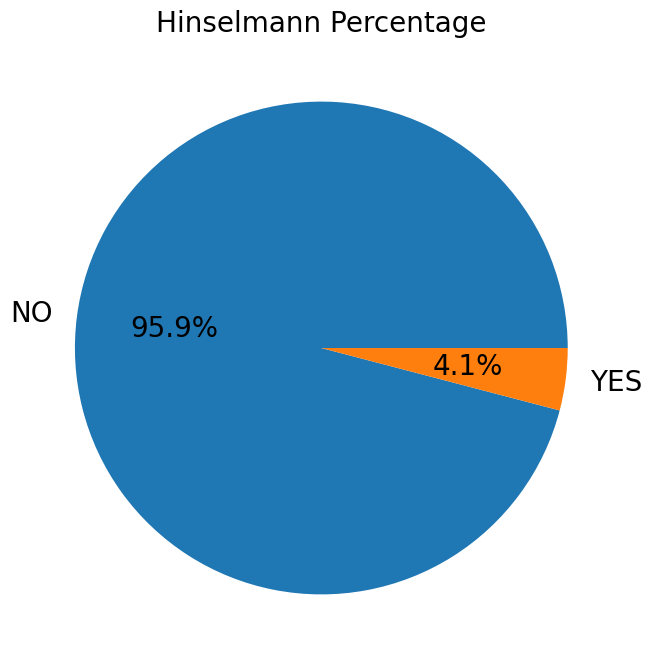

In [129]:
uni = df.astype('float')

plt.figure(figsize = (12,8))
plt.pie(uni['Hinselmann'].value_counts(), labels = ['NO', 'YES'], autopct = '%1.1f%%', labeldistance=1.1, textprops = {'fontsize': 20})
plt.title('Hinselmann Percentage', fontsize=20)
plt.show()

# Observation :
So, only 4.1% of the record have positive biopsy result i.e. people having cervical cancer.

Smokes
0.0    735
1.0    123
Name: count, dtype: int64


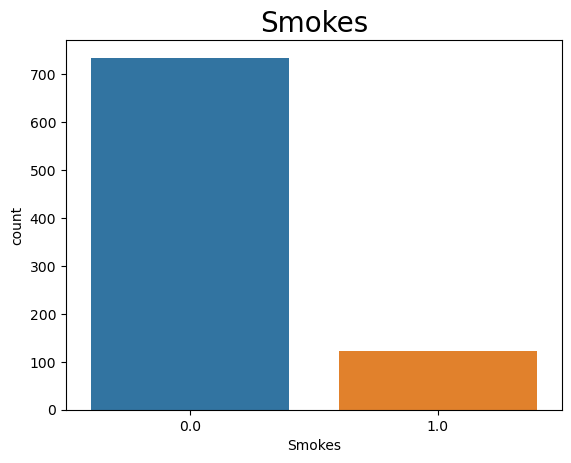

In [133]:
sns.countplot(x = 'Smokes', data = df)
plt.title('Smokes', fontsize=20)
print(df.Smokes.value_counts())

Text(0.5, 1.0, 'Hormonal Contraceptives')

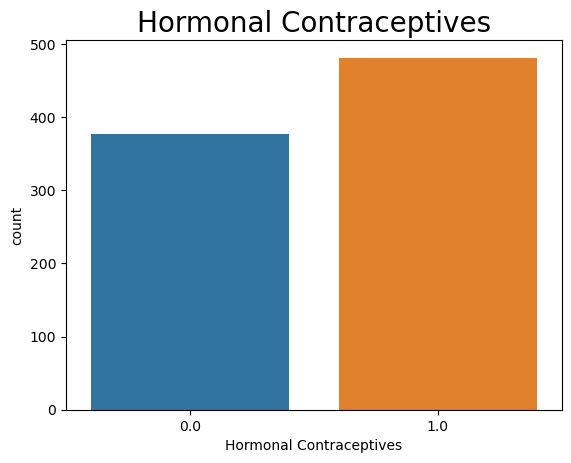

In [140]:
sns.countplot(x = 'Hormonal Contraceptives', data = df)
plt.title('Hormonal Contraceptives', fontsize=20)
# print(df.Hormonal Contraceptives.value_counts())

IUD
0.0    775
1.0     83
Name: count, dtype: int64


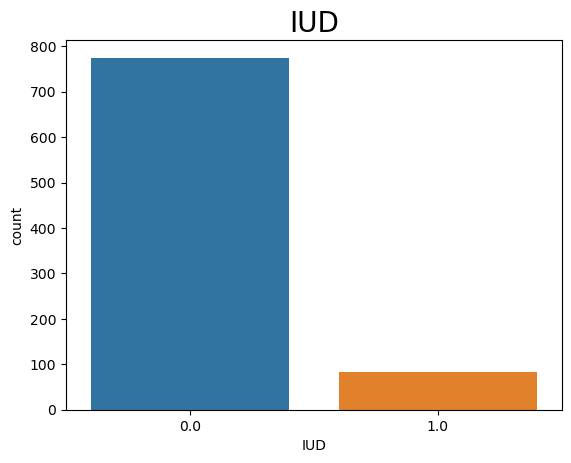

In [143]:
sns.countplot(x = 'IUD', data = df)
plt.title('IUD', fontsize=20)
print(df.IUD.value_counts())

STDs
0.0    779
1.0     79
Name: count, dtype: int64


Text(0.5, 1.0, 'STDs')

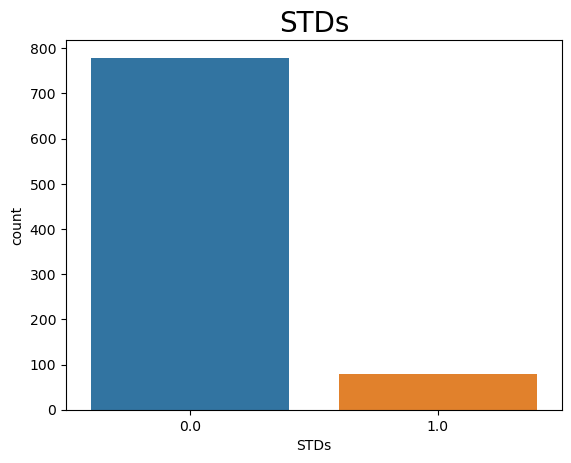

In [145]:
sns.countplot(x = 'STDs', data = df)
print(df.STDs.value_counts())
plt.title('STDs', fontsize=20)

Text(0.5, 1.0, 'STDs:condylomatosis')

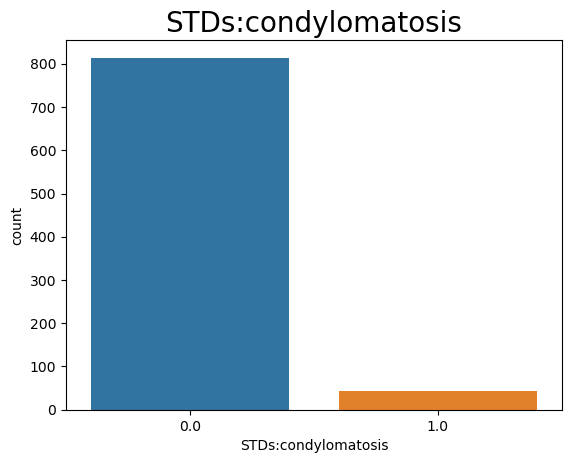

In [147]:
sns.countplot(x = 'STDs:condylomatosis', data = df)
# print(df.STDs:condylomatosis.value_counts())
plt.title('STDs:condylomatosis', fontsize=20)

Text(0.5, 1.0, 'STDs:cervical condylomatosis')

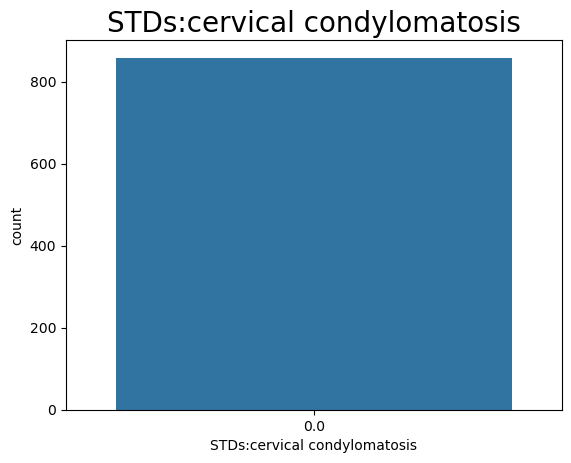

In [151]:
sns.countplot(x = 'STDs:cervical condylomatosis', data = df)
# print(df.STDs:cervical condylomatosis.value_counts())
plt.title('STDs:cervical condylomatosis', fontsize=20)

Text(0.5, 1.0, 'STDs:vaginal condylomatosis')

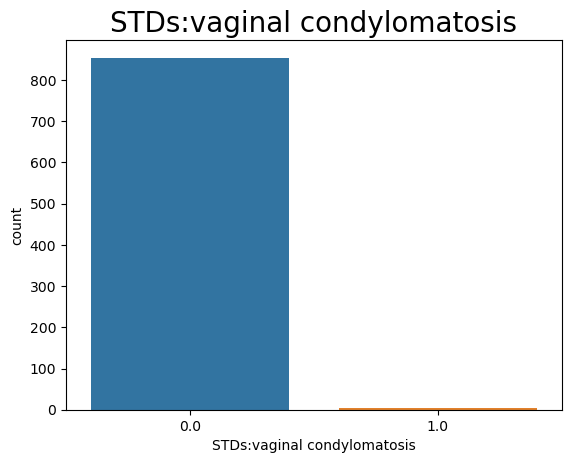

In [152]:
sns.countplot(x = 'STDs:vaginal condylomatosis', data = df)
# print(df.STDs:vaginal condylomatosis.value_counts())
plt.title('STDs:vaginal condylomatosis', fontsize=20)

Text(0.5, 1.0, 'STDs:vulvo-perineal condylomatosis')

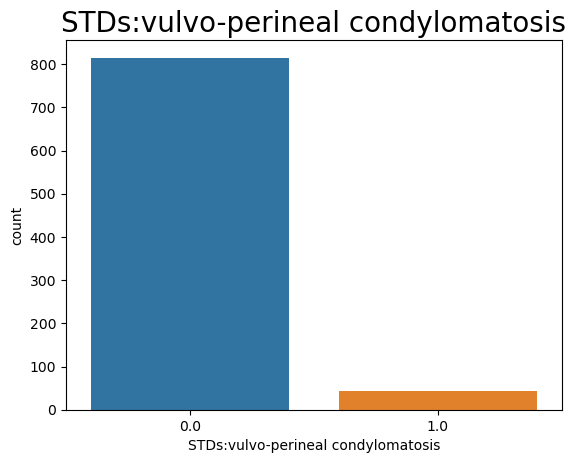

In [154]:
sns.countplot(x = 'STDs:vulvo-perineal condylomatosis', data = df)
# print(df.STDs:vulvo-perineal condylomatosis.value_counts())
plt.title('STDs:vulvo-perineal condylomatosis', fontsize=20)

Text(0.5, 1.0, 'STDs:syphilis')

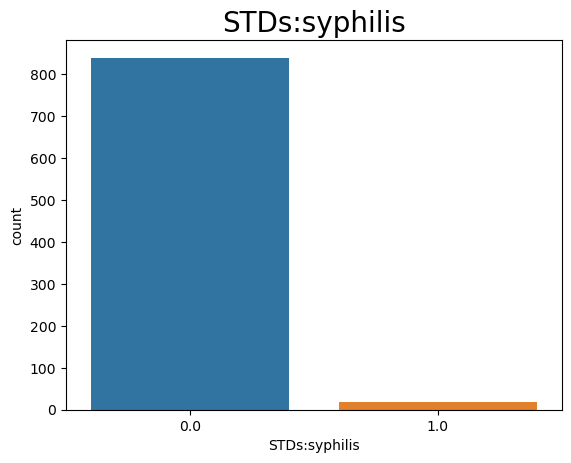

In [155]:
sns.countplot(x = 'STDs:syphilis', data = df)
# print(df.STDs:syphilis.value_counts())
plt.title('STDs:syphilis', fontsize=20)

Text(0.5, 1.0, 'STDs:pelvic inflammatory disease')

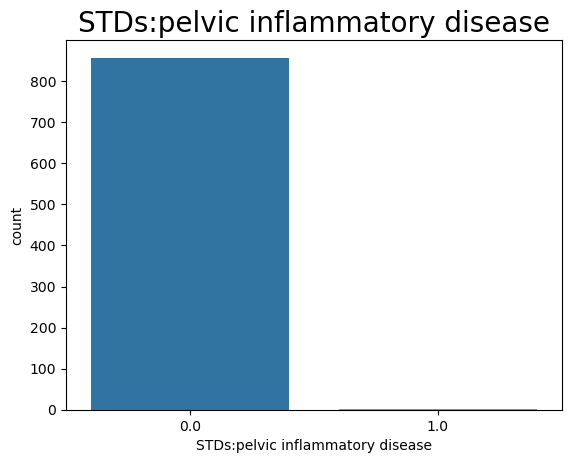

In [156]:
sns.countplot(x = 'STDs:pelvic inflammatory disease', data = df)
# print(df.STDs:pelvic inflammatory disease.value_counts())
plt.title('STDs:pelvic inflammatory disease', fontsize=20)

Text(0.5, 1.0, 'STDs:genital herpes')

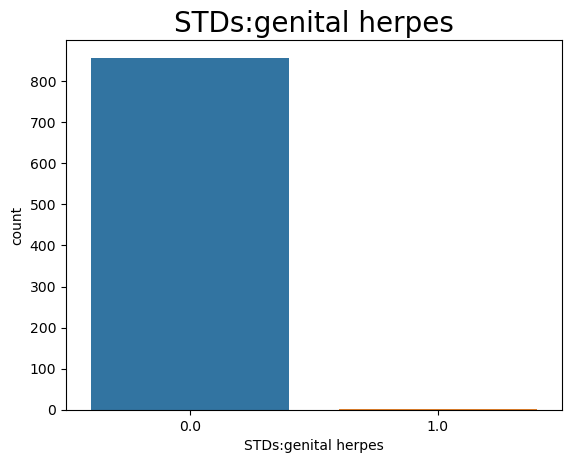

In [157]:
sns.countplot(x = 'STDs:genital herpes', data = df)
# print(df.STDs:genital herpes.value_counts())
plt.title('STDs:genital herpes', fontsize=20)

Text(0.5, 1.0, 'STDs:molluscum contagiosum')

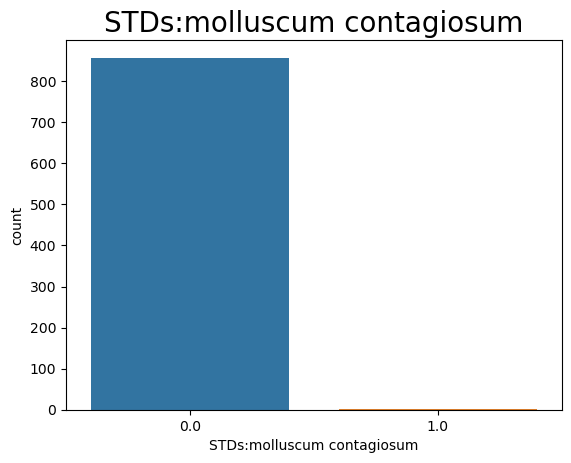

In [158]:
sns.countplot(x = 'STDs:molluscum contagiosum', data = df)
# print(df.STDs:molluscum contagiosum.value_counts())
plt.title('STDs:molluscum contagiosum', fontsize=20)

Text(0.5, 1.0, 'STDs:AIDS')

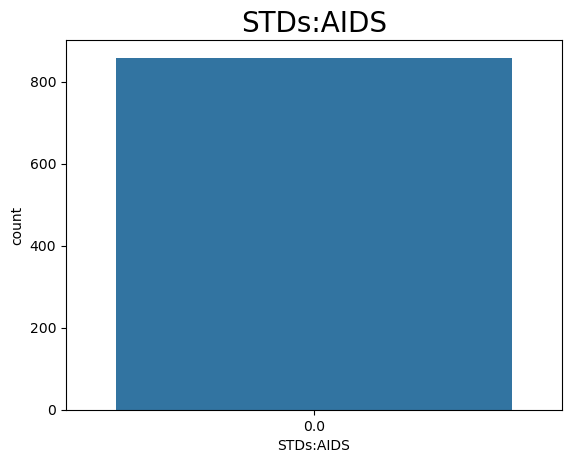

In [162]:
sns.countplot(x = 'STDs:AIDS', data = df)
# print(df.STDs:AIDS.value_counts())
plt.title('STDs:AIDS', fontsize=20)

Text(0.5, 1.0, 'STDs:HIV')

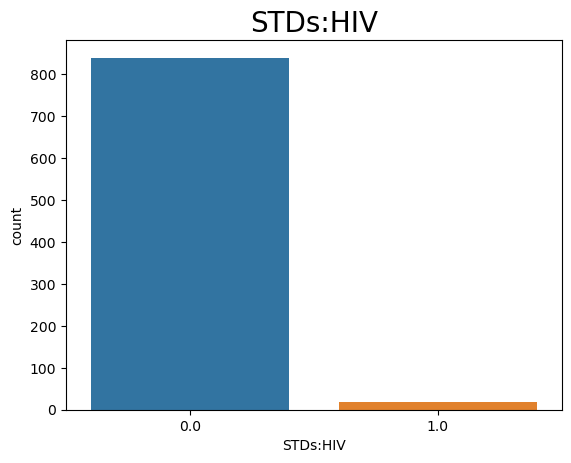

In [163]:
sns.countplot(x = 'STDs:HIV', data = df)
# print(df.STDs:HIV.value_counts())
plt.title('STDs:HIV', fontsize=20)

Text(0.5, 1.0, 'STDs:Hepatitis B')

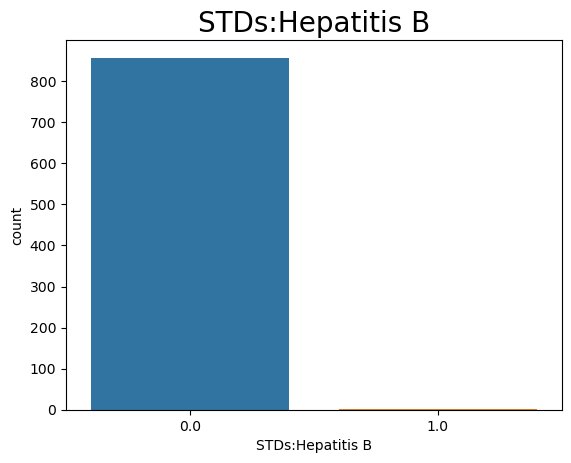

In [164]:
sns.countplot(x = 'STDs:Hepatitis B', data = df)
# print(df.STDs:Hepatitis B.value_counts())
plt.title('STDs:Hepatitis B', fontsize=20)

Text(0.5, 1.0, 'STDs:HPV')

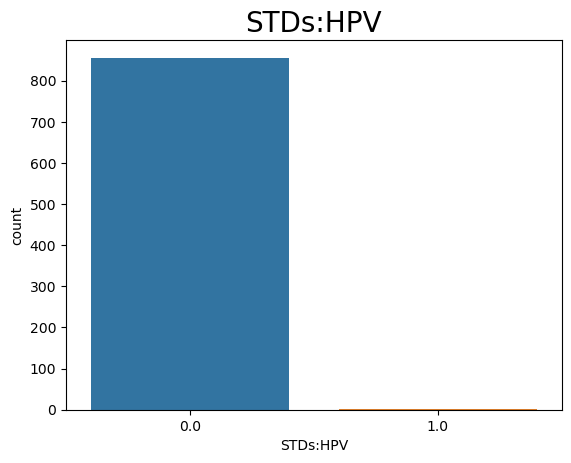

In [165]:
sns.countplot(x = 'STDs:HPV', data = df)
# print(df.STDs:HPV.value_counts())
plt.title('STDs:HPV', fontsize=20)

Biopsy
0.0    803
1.0     55
Name: count, dtype: int64


Text(0.5, 1.0, 'Biopsy')

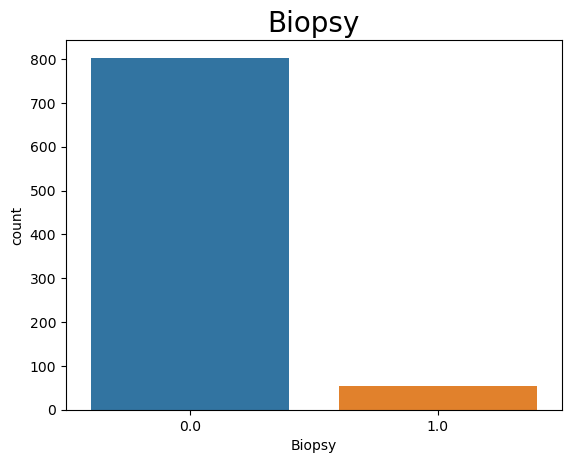

In [166]:
sns.countplot(x = 'Biopsy', data = df)
print(df.Biopsy.value_counts())
plt.title('Biopsy', fontsize=20)

Citology
0.0    814
1.0     44
Name: count, dtype: int64


Text(0.5, 1.0, 'Citology')

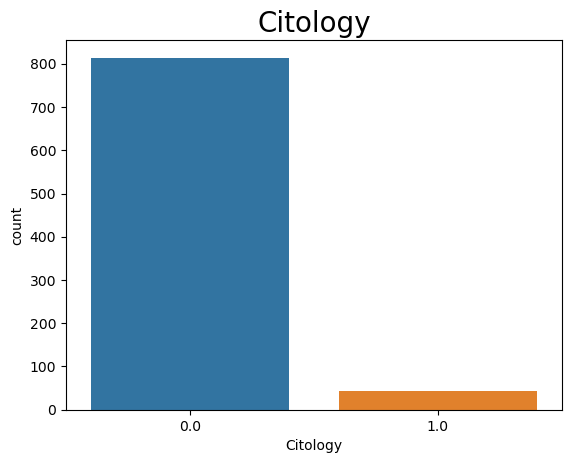

In [167]:
sns.countplot(x = 'Citology', data = df)
print(df.Citology.value_counts())
plt.title('Citology', fontsize=20)

Density Plots

****************************************************************************************************


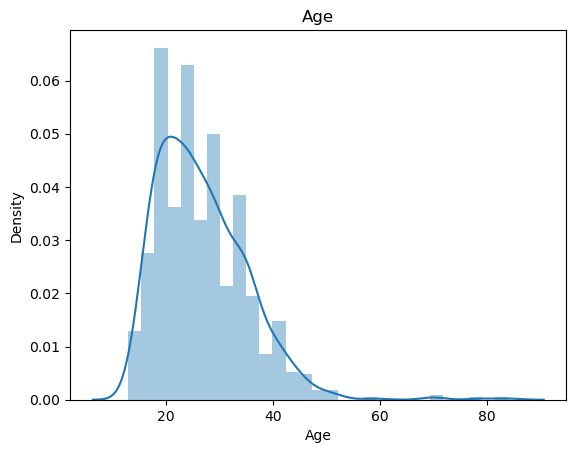

****************************************************************************************************


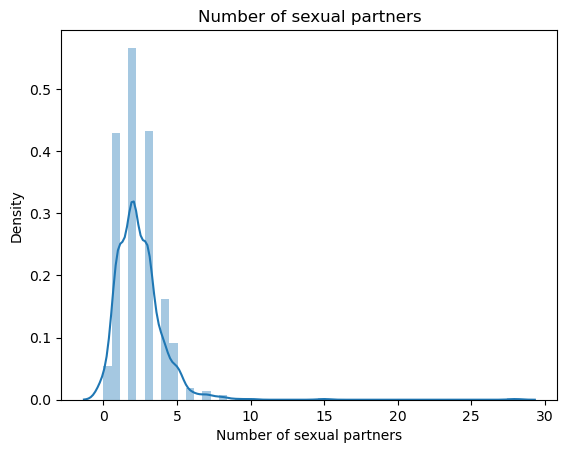

****************************************************************************************************


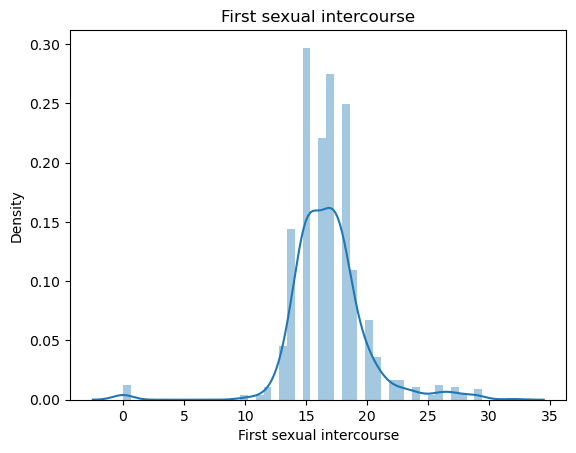

****************************************************************************************************


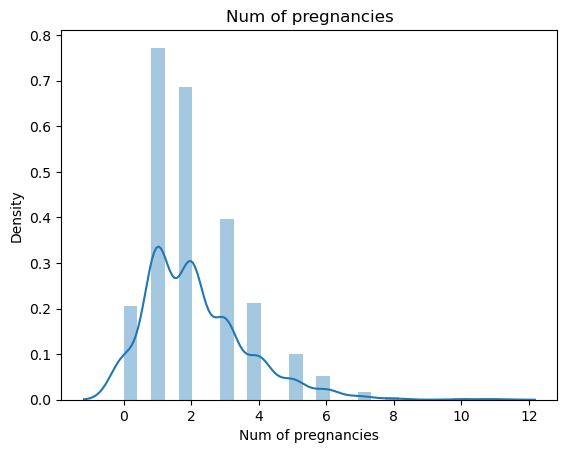

****************************************************************************************************


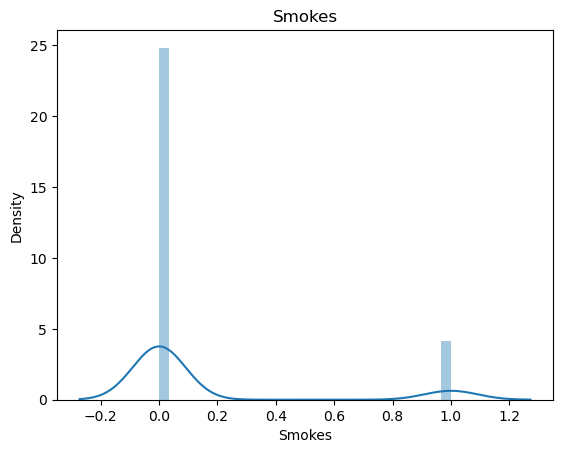

****************************************************************************************************


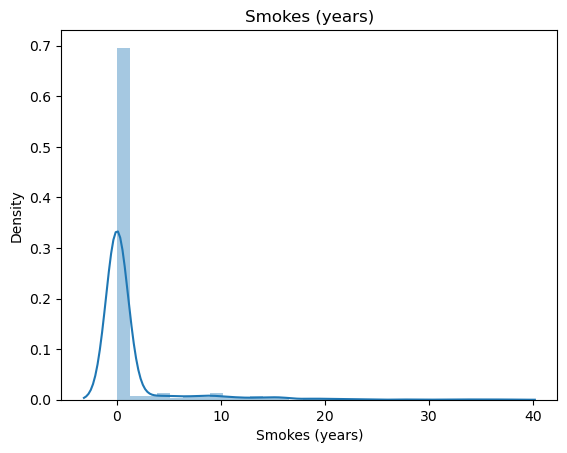

****************************************************************************************************


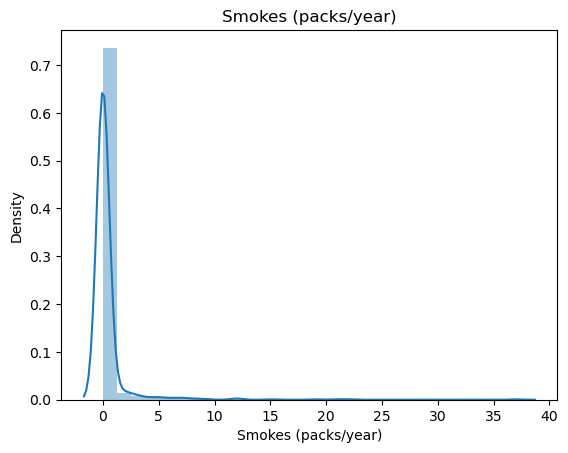

****************************************************************************************************


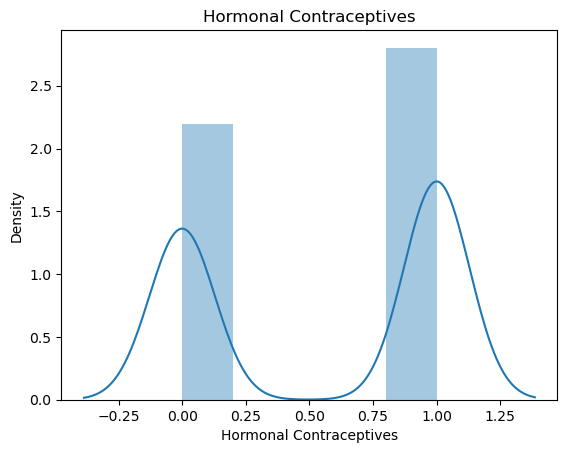

****************************************************************************************************


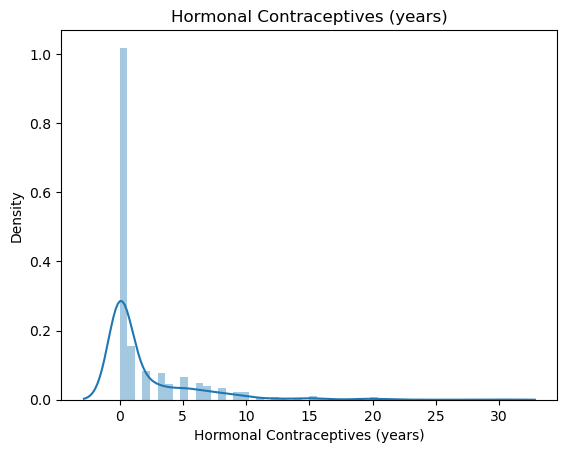

****************************************************************************************************


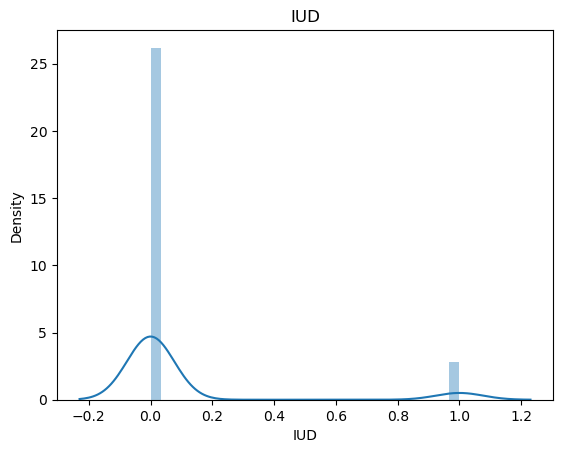

****************************************************************************************************


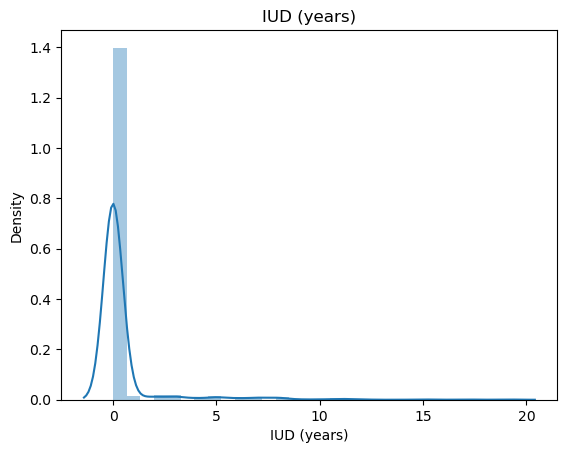

****************************************************************************************************


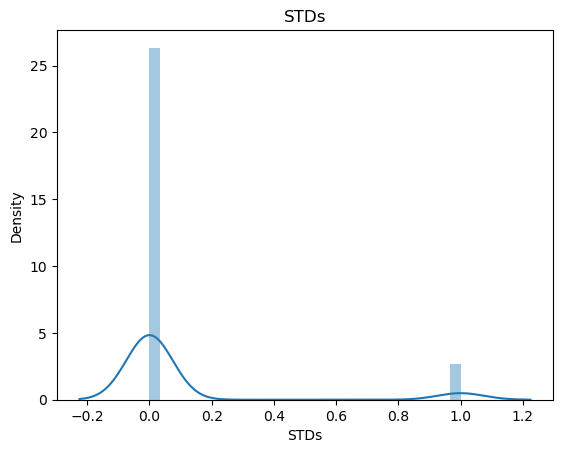

****************************************************************************************************


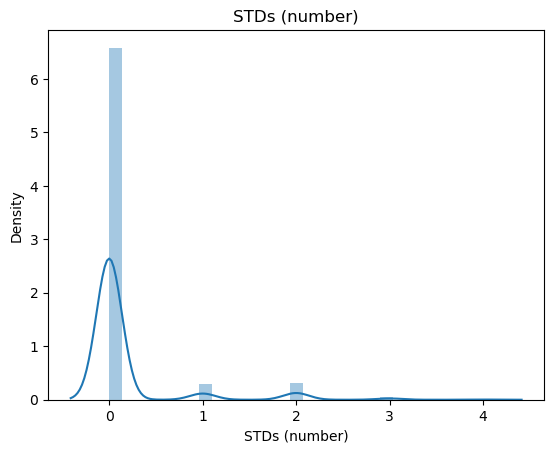

****************************************************************************************************


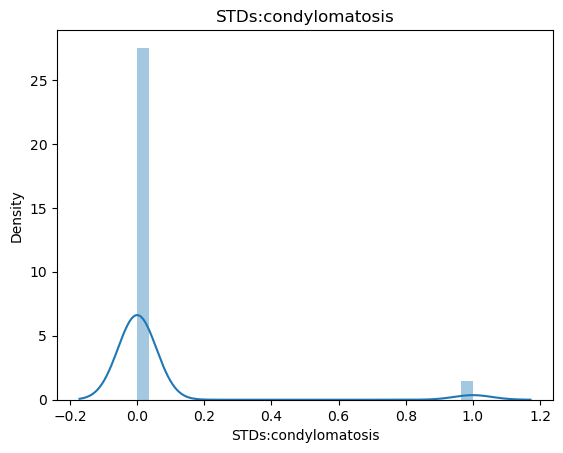

****************************************************************************************************


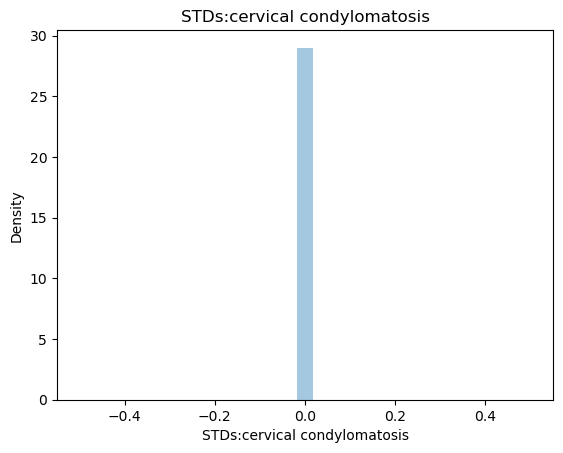

****************************************************************************************************


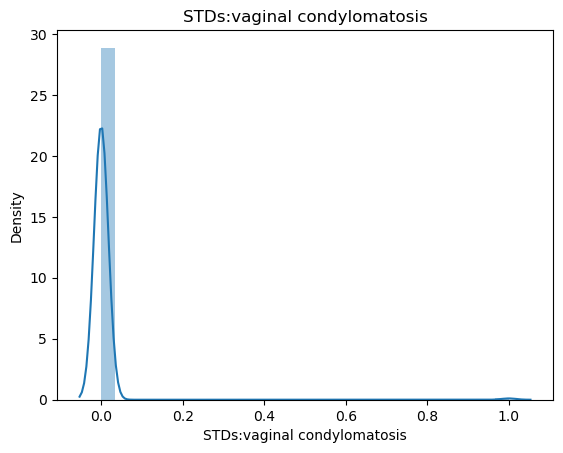

****************************************************************************************************


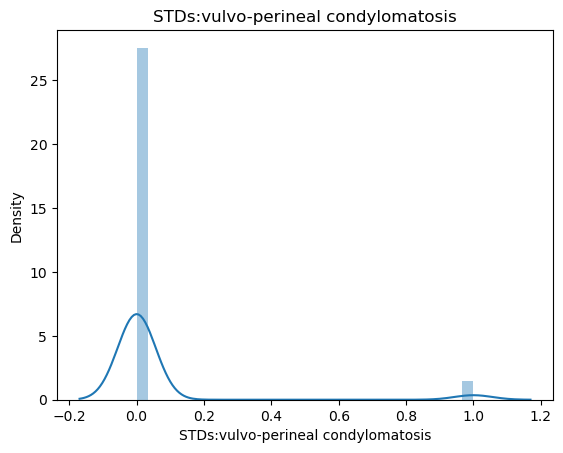

****************************************************************************************************


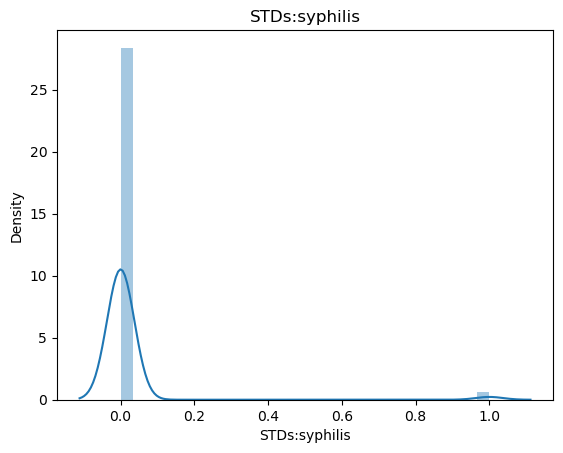

****************************************************************************************************


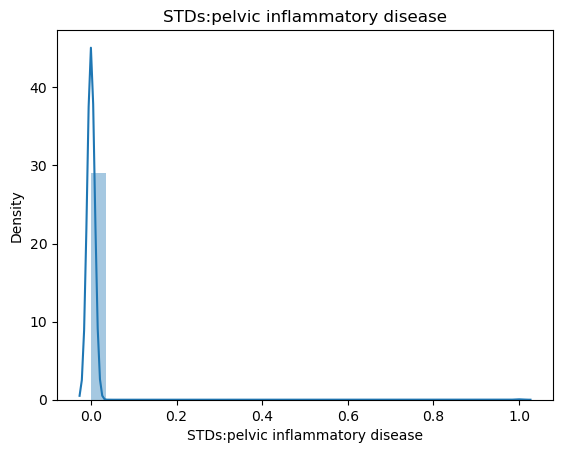

****************************************************************************************************


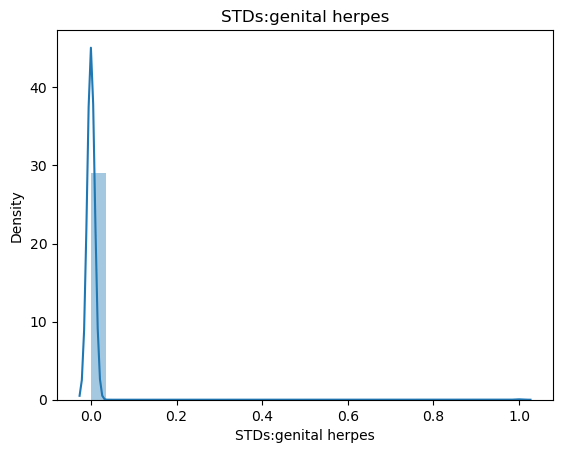

****************************************************************************************************


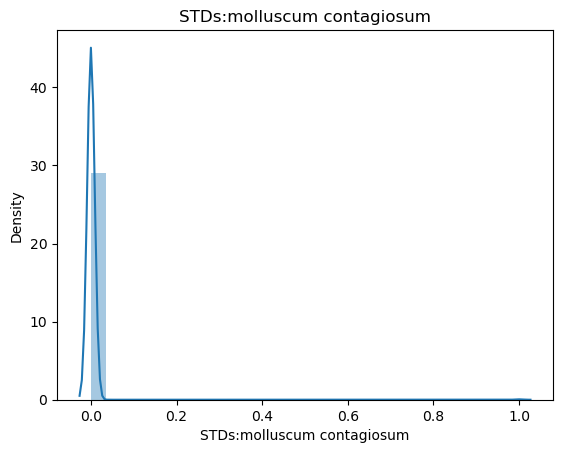

****************************************************************************************************


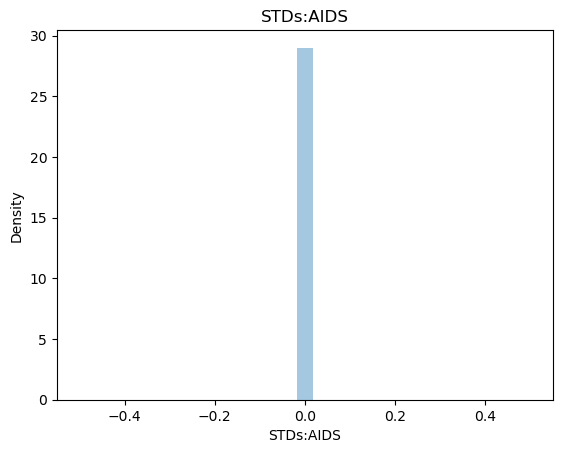

****************************************************************************************************


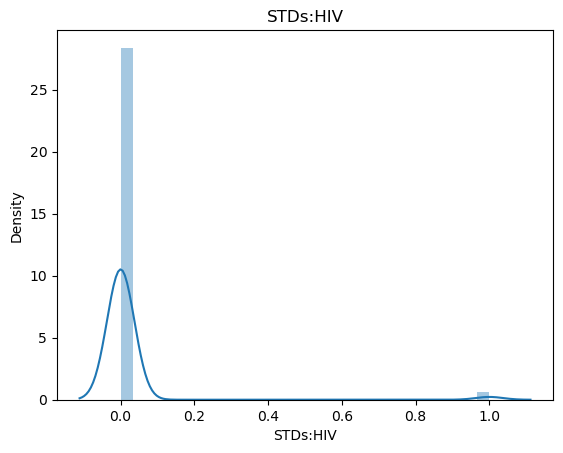

****************************************************************************************************


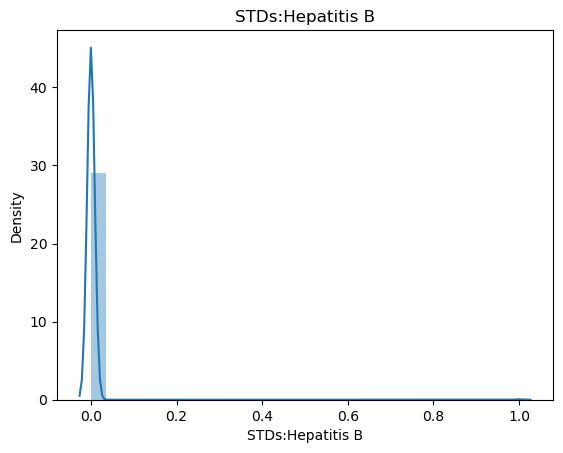

****************************************************************************************************


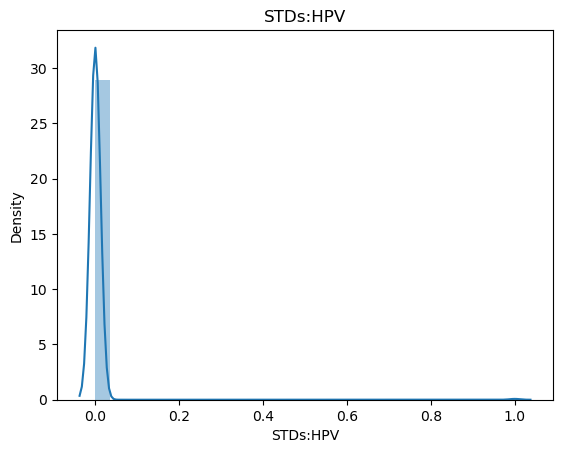

****************************************************************************************************


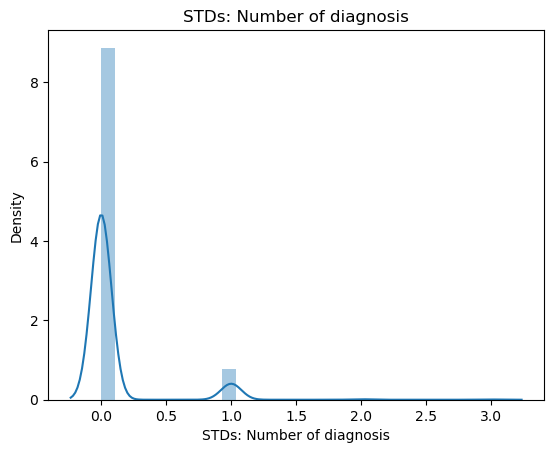

****************************************************************************************************


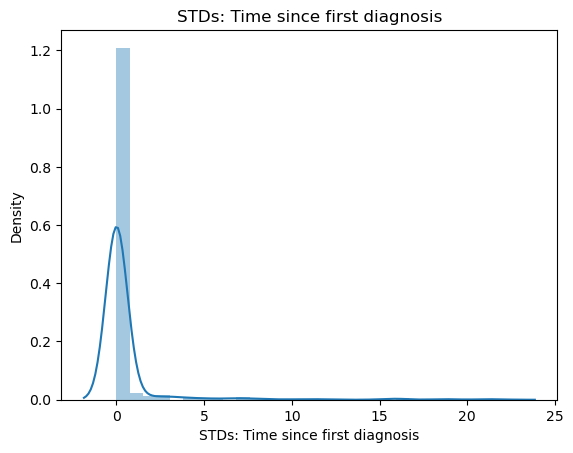

****************************************************************************************************


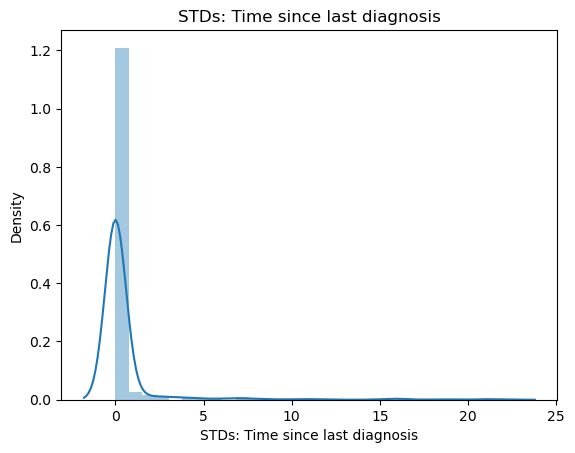

****************************************************************************************************


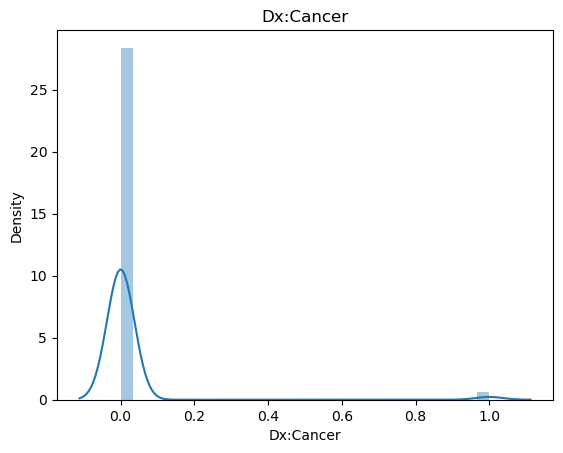

****************************************************************************************************


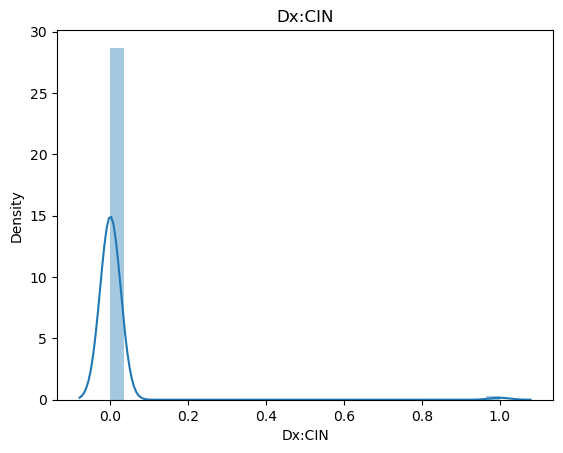

****************************************************************************************************


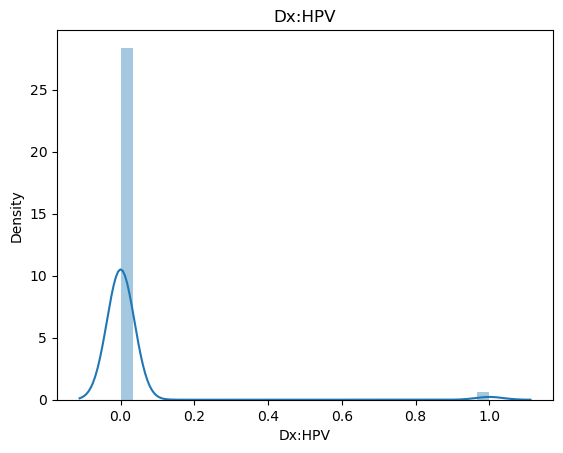

****************************************************************************************************


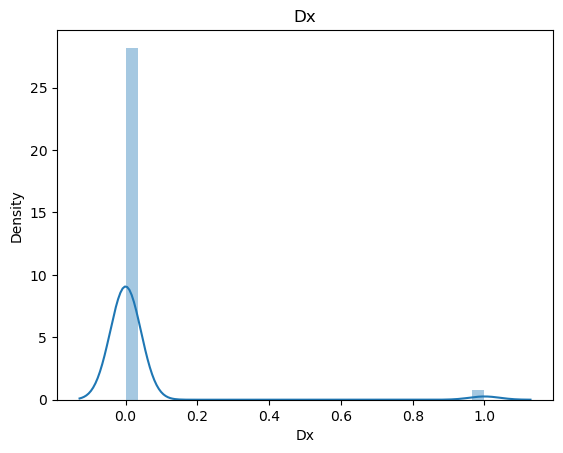

****************************************************************************************************


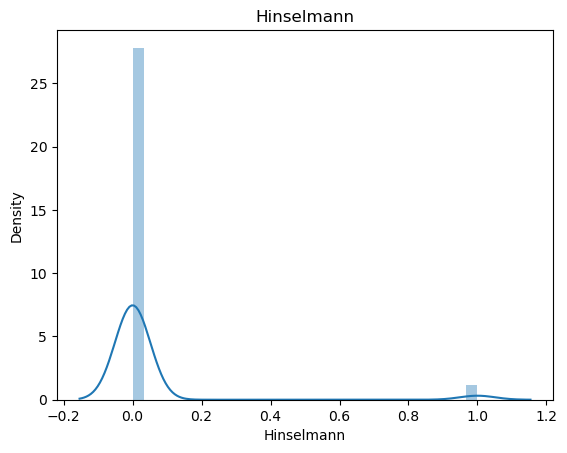

****************************************************************************************************


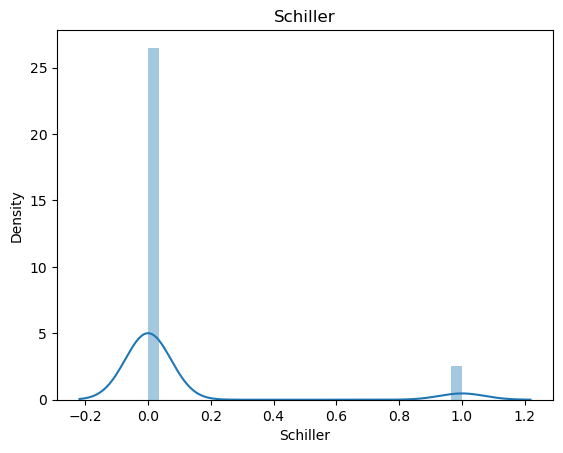

****************************************************************************************************


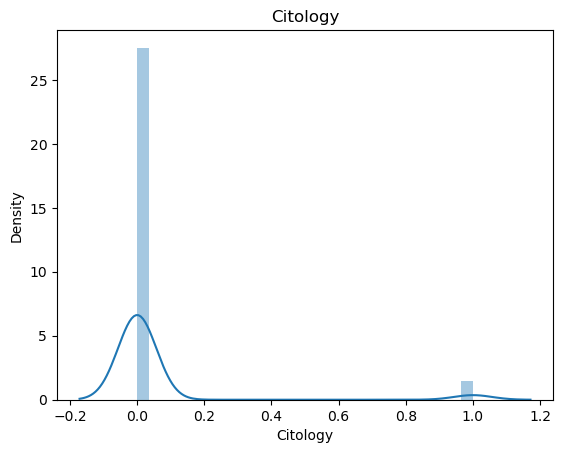

****************************************************************************************************


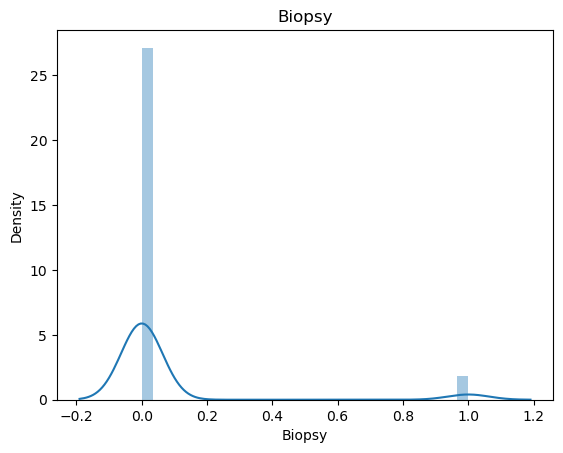

In [172]:
print("Density Plots");print()
for i in df:
        print('*'*100)
        sns.distplot(uni[i])
        plt.title(i)
        plt.show()


# Insight

Most of the patients are in the age group 20 -40.


### Smoking Habits :
Relatively larger proportion of the patients are non smokers (around 700) and only a very few (around 100) are smokers.

### Sexual Habits :
Predominant of the patients had 0 -5 sexual partners.
Most of them had their first sexual intercourse between 15 - 20 years.
The larger group of patient had 1 -3 pregancies overall in their life.

### Birth Control Habits :
Most of the patients have used Hormonal contraceptives methods like pills and medications for birth controls where only a few of them have opted for intrauterine devices (IUDs). The reason for this is may be that hormonal contraceptives are readily available in shops (needs presciption) and one can take those at their home on their own with some sort of guidance where as IUD needs an doctor supervision and the patient needs to be in hospital.

Generally most patients have used birth control methods only for less than 2 years while very few of them have used more than 2 years.

### Sexually Transmitted Diseases :
The countplot above depicts that only a very very people are affected by any one of the STDs.
So clearly there's an imbalance here and hence we can suggest that the STD attributes may have significant role while building the models.

## Bivariate Analysis

<Axes: xlabel='Number of sexual partners', ylabel='count'>

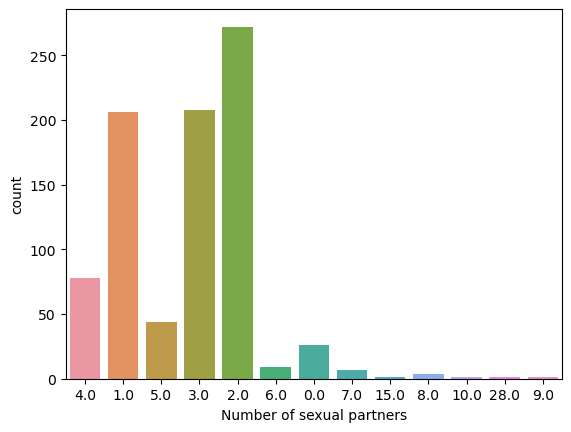

In [22]:
sns.countplot(x = 'Number of sexual partners', data = df )


In [23]:
df.groupby('Number of sexual partners')['Hinselmann'].value_counts().sort_values(ascending=False)

Number of sexual partners  Hinselmann
2.0                        0             262
3.0                        0             196
1.0                        0             196
4.0                        0              77
5.0                        0              43
0.0                        0              25
3.0                        1              12
2.0                        1              10
1.0                        1              10
6.0                        0               9
7.0                        0               7
8.0                        0               4
15.0                       0               1
28.0                       0               1
0.0                        1               1
10.0                       0               1
4.0                        1               1
5.0                        1               1
9.0                        0               1
Name: count, dtype: int64

<Axes: xlabel='Number of sexual partners', ylabel='count'>

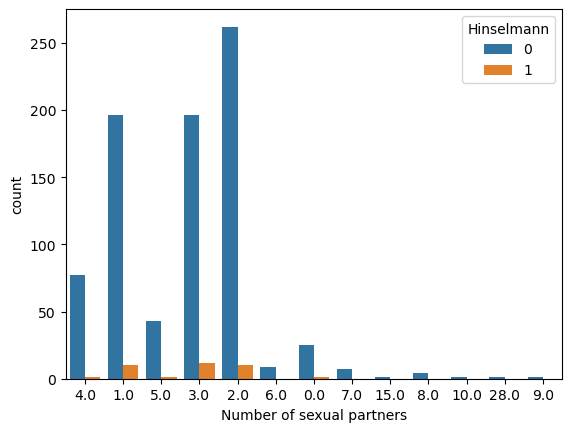

In [24]:
sns.countplot(x = 'Number of sexual partners', hue = 'Hinselmann', data = df )

In [25]:
df.groupby('Smokes')['Hinselmann'].value_counts().sort_values(ascending=False)

Smokes  Hinselmann
0.0     0             707
1.0     0             116
0.0     1              28
1.0     1               7
Name: count, dtype: int64

<Axes: xlabel='Smokes', ylabel='count'>

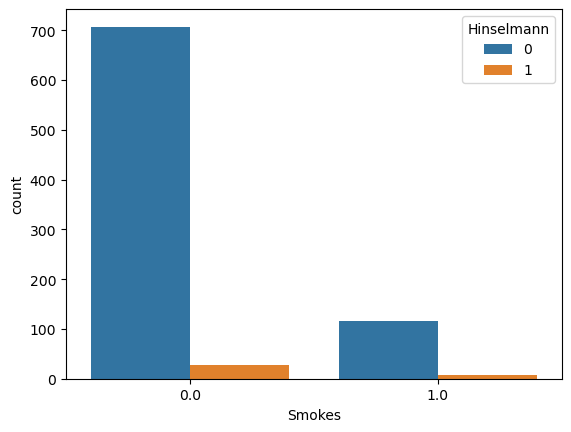

In [26]:
sns.countplot(x = 'Smokes', hue = 'Hinselmann', data = df )

In [28]:
df.groupby('Smokes (years)')['Hinselmann'].value_counts().sort_values(ascending=False)

Smokes (years)  Hinselmann
0.0             0             707
                1              28
1.266972909     0              15
5.0             0               9
9.0             0               9
1.0             0               8
3.0             0               7
16.0            0               6
8.0             0               6
2.0             0               6
11.0            0               5
7.0             0               5
4.0             0               5
14.0            0               4
10.0            0               4
6.0             0               4
12.0            0               3
15.0            0               3
19.0            0               3
13.0            0               3
0.5             0               2
32.0            0               1
7.0             1               1
0.16            0               1
37.0            0               1
34.0            1               1
22.0            0               1
10.0            1               1
28.0            0    

In [29]:
df.groupby('Smokes (packs/year)')['Hinselmann'].value_counts().sort_values(ascending=False)

Smokes (packs/year)  Hinselmann
0.0                  0             707
                     1              28
0.5132021277         0              18
1.0                  0               6
3.0                  0               5
                                  ... 
2.0                  1               1
2.1                  0               1
0.3                  0               1
2.25                 0               1
2.2                  0               1
Name: count, Length: 66, dtype: int64

In [30]:
df.groupby('Hormonal Contraceptives')['Hinselmann'].value_counts().sort_values(ascending=False)

Hormonal Contraceptives  Hinselmann
1.0                      0             456
0.0                      0             367
1.0                      1              25
0.0                      1              10
Name: count, dtype: int64

<Axes: xlabel='Hormonal Contraceptives', ylabel='count'>

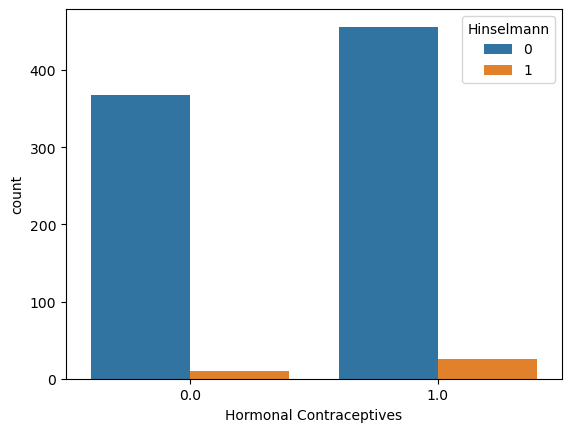

In [31]:
sns.countplot(x = 'Hormonal Contraceptives', hue = 'Hinselmann', data = df )

In [32]:
df.groupby('STDs:condylomatosis')['Hinselmann'].value_counts().sort_values(ascending=False)

STDs:condylomatosis  Hinselmann
0.0                  0             783
1.0                  0              40
0.0                  1              31
1.0                  1               4
Name: count, dtype: int64

<Axes: xlabel='STDs:condylomatosis', ylabel='count'>

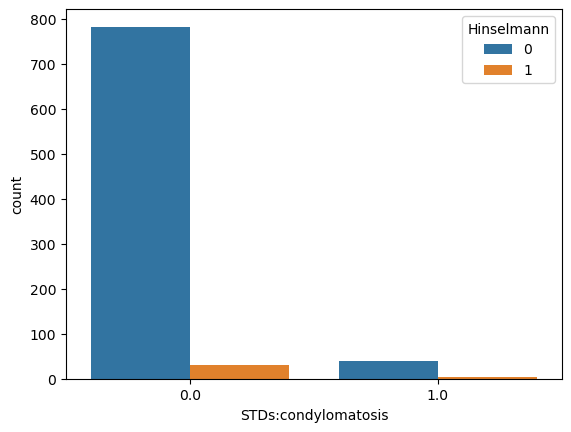

In [33]:
sns.countplot(x = 'STDs:condylomatosis', hue = 'Hinselmann', data = df )

In [34]:
df.groupby('STDs:cervical condylomatosis')['Hinselmann'].value_counts().sort_values(ascending=False)

STDs:cervical condylomatosis  Hinselmann
0.0                           0             823
                              1              35
Name: count, dtype: int64

<Axes: xlabel='STDs:cervical condylomatosis', ylabel='count'>

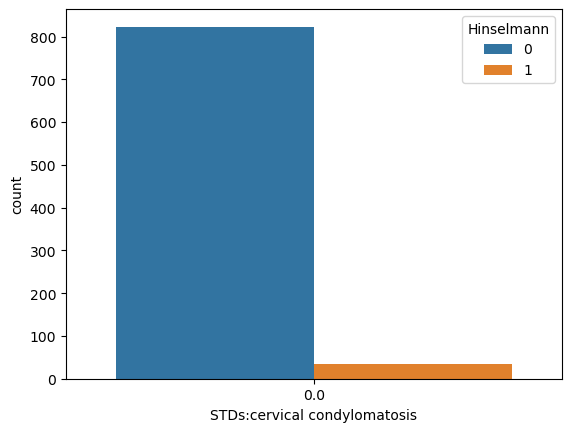

In [35]:
sns.countplot(x = 'STDs:cervical condylomatosis', hue = 'Hinselmann', data = df )

In [36]:
df.groupby('STDs:vaginal condylomatosis')['Hinselmann'].value_counts().sort_values(ascending=False)

STDs:vaginal condylomatosis  Hinselmann
0.0                          0             819
                             1              35
1.0                          0               4
Name: count, dtype: int64

<Axes: xlabel='STDs:vaginal condylomatosis', ylabel='count'>

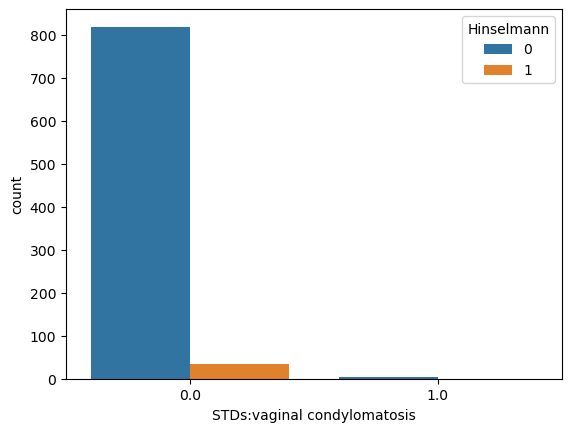

In [37]:
sns.countplot(x = 'STDs:vaginal condylomatosis', hue = 'Hinselmann', data = df )

## Muti-variate Analysis

Text(0.5, 1.0, 'Hinselmann vs First Sexual Intercourse vs Age')

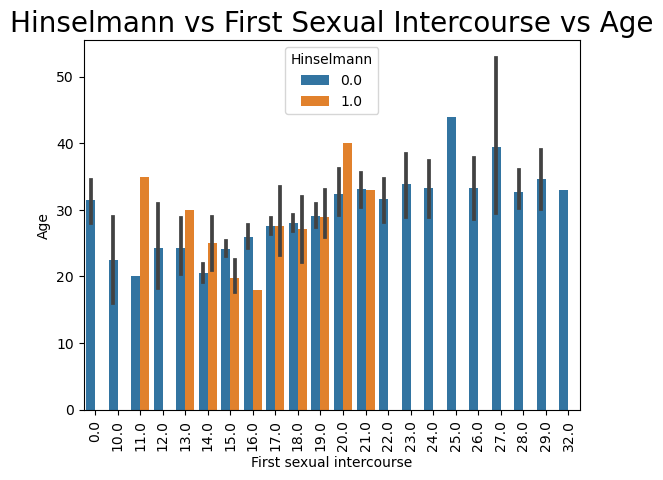

In [188]:
sns.barplot(data = df, y='Age', x='First sexual intercourse', hue = 'Hinselmann')
plt.xticks(rotation=90)
plt.title('Hinselmann vs First Sexual Intercourse vs Age', fontsize=20)
# xlable('Age during First Sexual Intercourse')


Text(0.5, 1.0, 'Hinselmann vs Number of sexual partners vs Age')

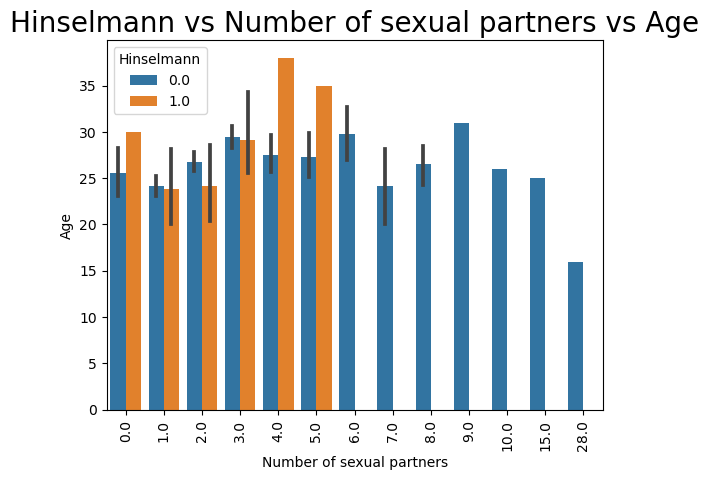

In [189]:
sns.barplot(data = df, y='Age', x='Number of sexual partners', hue = 'Hinselmann')
plt.xticks(rotation=90)
plt.title('Hinselmann vs Number of sexual partners vs Age', fontsize=20)



Text(0.5, 1.0, 'Hinselmann vs Num of pregnancies vs Age')

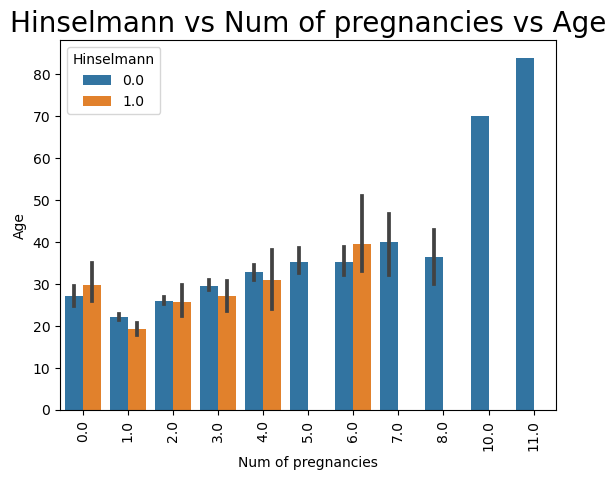

In [190]:
sns.barplot(data = df, y='Age', x='Num of pregnancies', hue = 'Hinselmann')
plt.xticks(rotation=90)
plt.title('Hinselmann vs Num of pregnancies vs Age', fontsize=20)


# Insights :
Those who had their first sexual intercourse in between 15 and 18 years of their life are more prone to be tested positive with Hinselmann test and those people are predominantly in the age group of 20 to 35.

The persons who have sexual partners between 1 & 3 are more prone to be testes as positive in Hinselmann test and they are predominantly in the age group of 20 to 35.

Higher the number of pregancies, higher the chances of getting positive Hinselmann test.

Text(0.5, 1.0, 'Hinselmann vs First sexual intercourse vs Smokes')

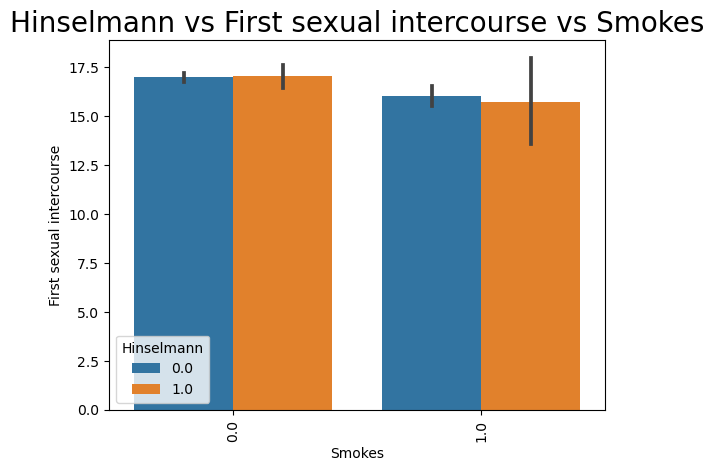

In [192]:
sns.barplot(data = df, y='First sexual intercourse', x='Smokes', hue = 'Hinselmann')
plt.xticks(rotation=90)
plt.title('Hinselmann vs First sexual intercourse vs Smokes', fontsize=20)


Text(0.5, 1.0, 'Hinselmann vs Number of sexual partners vs Smokes')

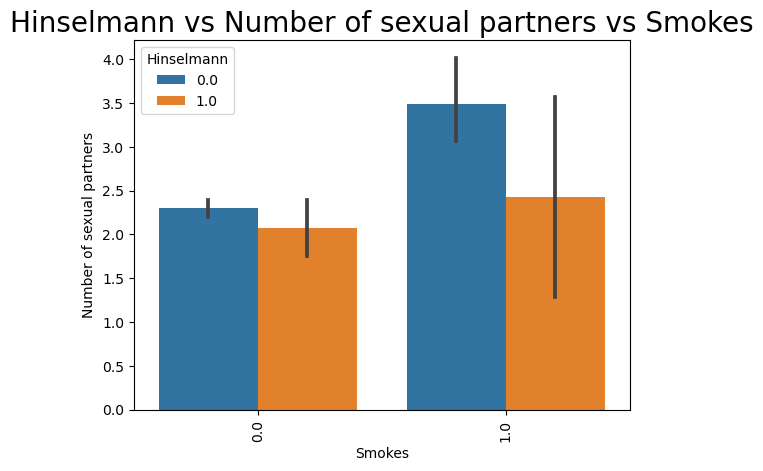

In [193]:
sns.barplot(data = df, y='Number of sexual partners', x='Smokes', hue = 'Hinselmann')
plt.xticks(rotation=90)
plt.title('Hinselmann vs Number of sexual partners vs Smokes', fontsize=20)

Text(0.5, 1.0, 'Hinselmann vs Num of pregnancies vs Smokes')

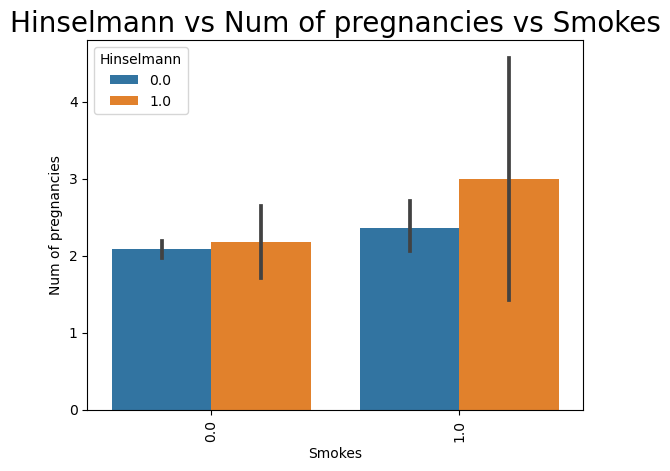

In [195]:
sns.barplot(data = df, y='Num of pregnancies', x='Smokes', hue = 'Hinselmann')
plt.xticks(rotation=90)
plt.title('Hinselmann vs Num of pregnancies vs Smokes', fontsize=20)

# Insights :

Those who smoke and had their first sexual intercourse in younger age between 15yrs and 18yrs are more prone to be test as Positive in Hinselmann test.

There is no clear relation between smoking and number of sex partners as the smoking cancer patients and non smoking patients, both have nearly same number of sex partners.

The person who smokes and have higher number of pregnancies are more prone to be tested as positive in Hinselmann test.

Text(0.5, 1.0, 'Hinselmann vs Age vs Smokes')

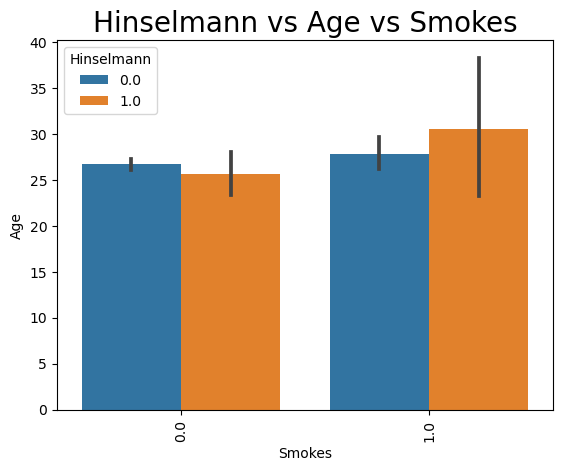

In [197]:
sns.barplot(data = df, y='Age', x='Smokes', hue = 'Hinselmann')
plt.xticks(rotation=90)
plt.title('Hinselmann vs Age vs Smokes', fontsize=20)

Text(0.5, 1.0, 'Hinselmann vs Age vs Smokes (years)')

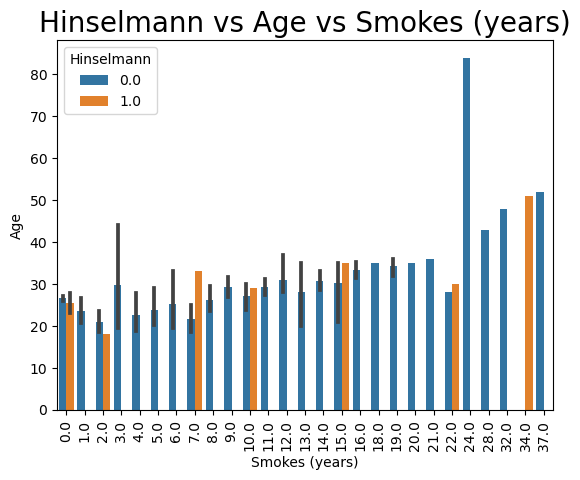

In [200]:
sns.barplot(data = df, y='Age', x='Smokes (years)', hue = 'Hinselmann')
plt.xticks(rotation=90)
plt.title('Hinselmann vs Smokes (years)', fontsize=20)

Text(0.5, 1.0, 'Hinselmann vs Age vs Smokes (packs/year)')

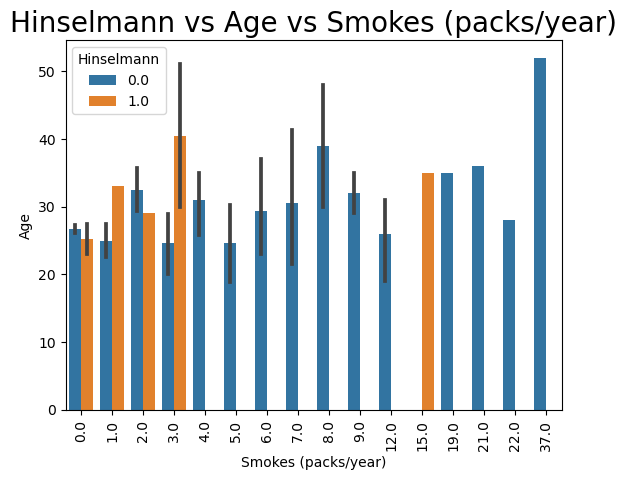

In [201]:
sns.barplot(data = df, y='Age', x='Smokes (packs/year)', hue = 'Hinselmann')
plt.xticks(rotation=90)
plt.title('Hinselmann vs Age vs Smokes (packs/year)', fontsize=20)

# Insights :

Cancer can affect to non-smokers as well and even in the young age (around 22 years) and the average age of Smoking cancer patients are higher than those of non smoking cancer patients. So the smoking people who are aged high are more prone to be test as positive.

The person who has smoked for atleast one year are more prone to be test as positive in Hinselmann test

The person who are aged high and smoke more number of packets a year are prone to be tested as postive in Hinselmann  test

<Axes: xlabel='IUD (years)', ylabel='count'>

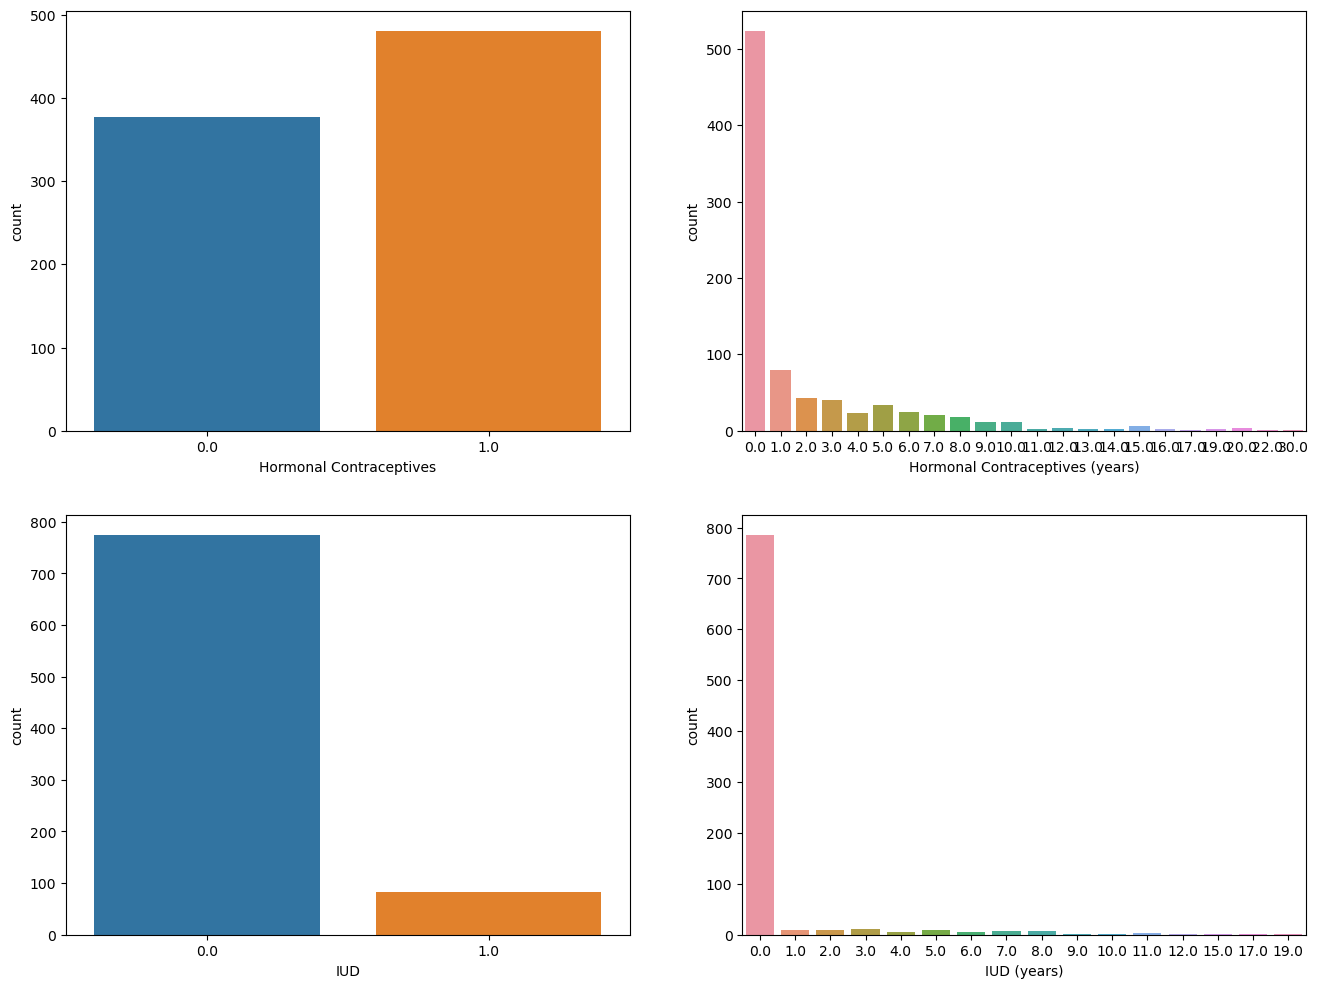

In [206]:
plt.subplots(2,2,figsize=(16,12))
plt.subplot(2,2,1)
sns.countplot(df, x='Hormonal Contraceptives')
plt.subplot(2,2,2)
sns.countplot(df, x='Hormonal Contraceptives (years)')
plt.subplot(2,2,3)
sns.countplot(df, x='IUD')
plt.subplot(2,2,4)
sns.countplot(df, x='IUD (years)')

# Insights

Most of the patients have used Hormonal contraceptives methods like pills and medications for birth controls where only a few of them have opted for intrauterine devices (IUDs). The reason for this is may be that hormonal contraceptives are readily available in shops (needs presciption) and one can take those at their home on their own with some sort of guidance where as IUD needs an doctor supervision and the patient needs to be in hospital.


Generally most patients have used birth control methods only for less than 2 years while very few of them have used upto 8

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


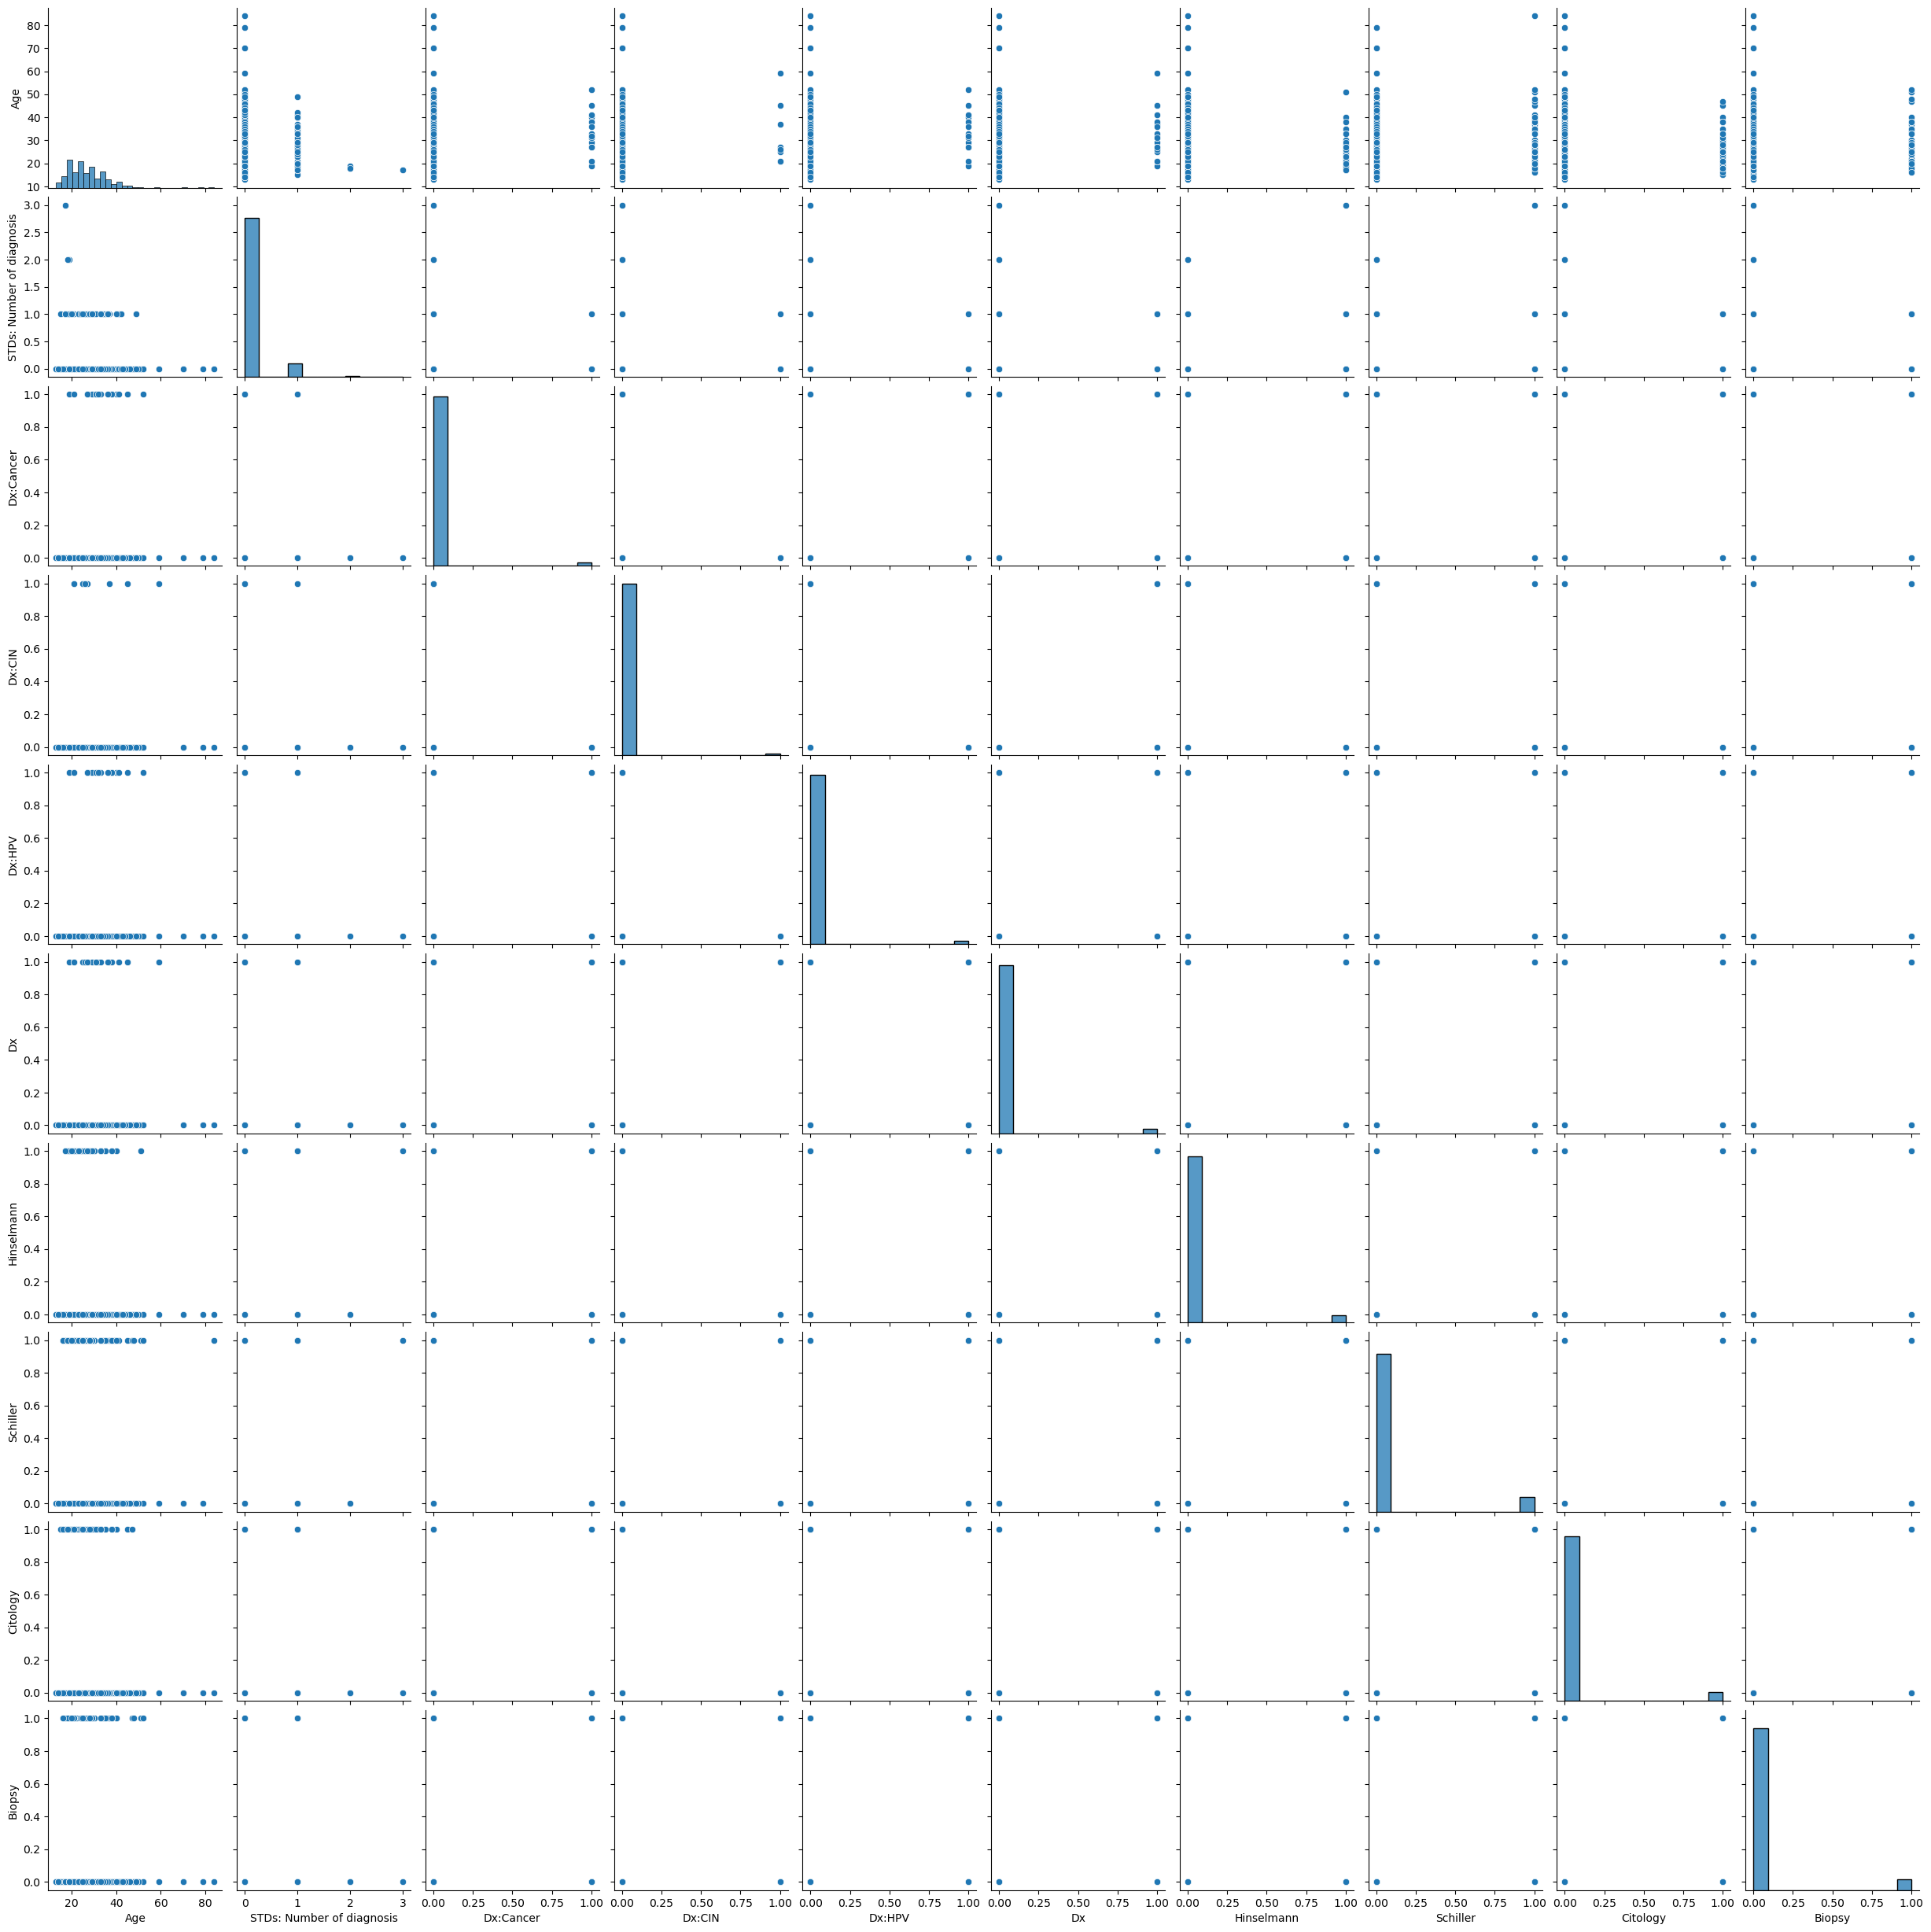

In [38]:
sns.pairplot(df)

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


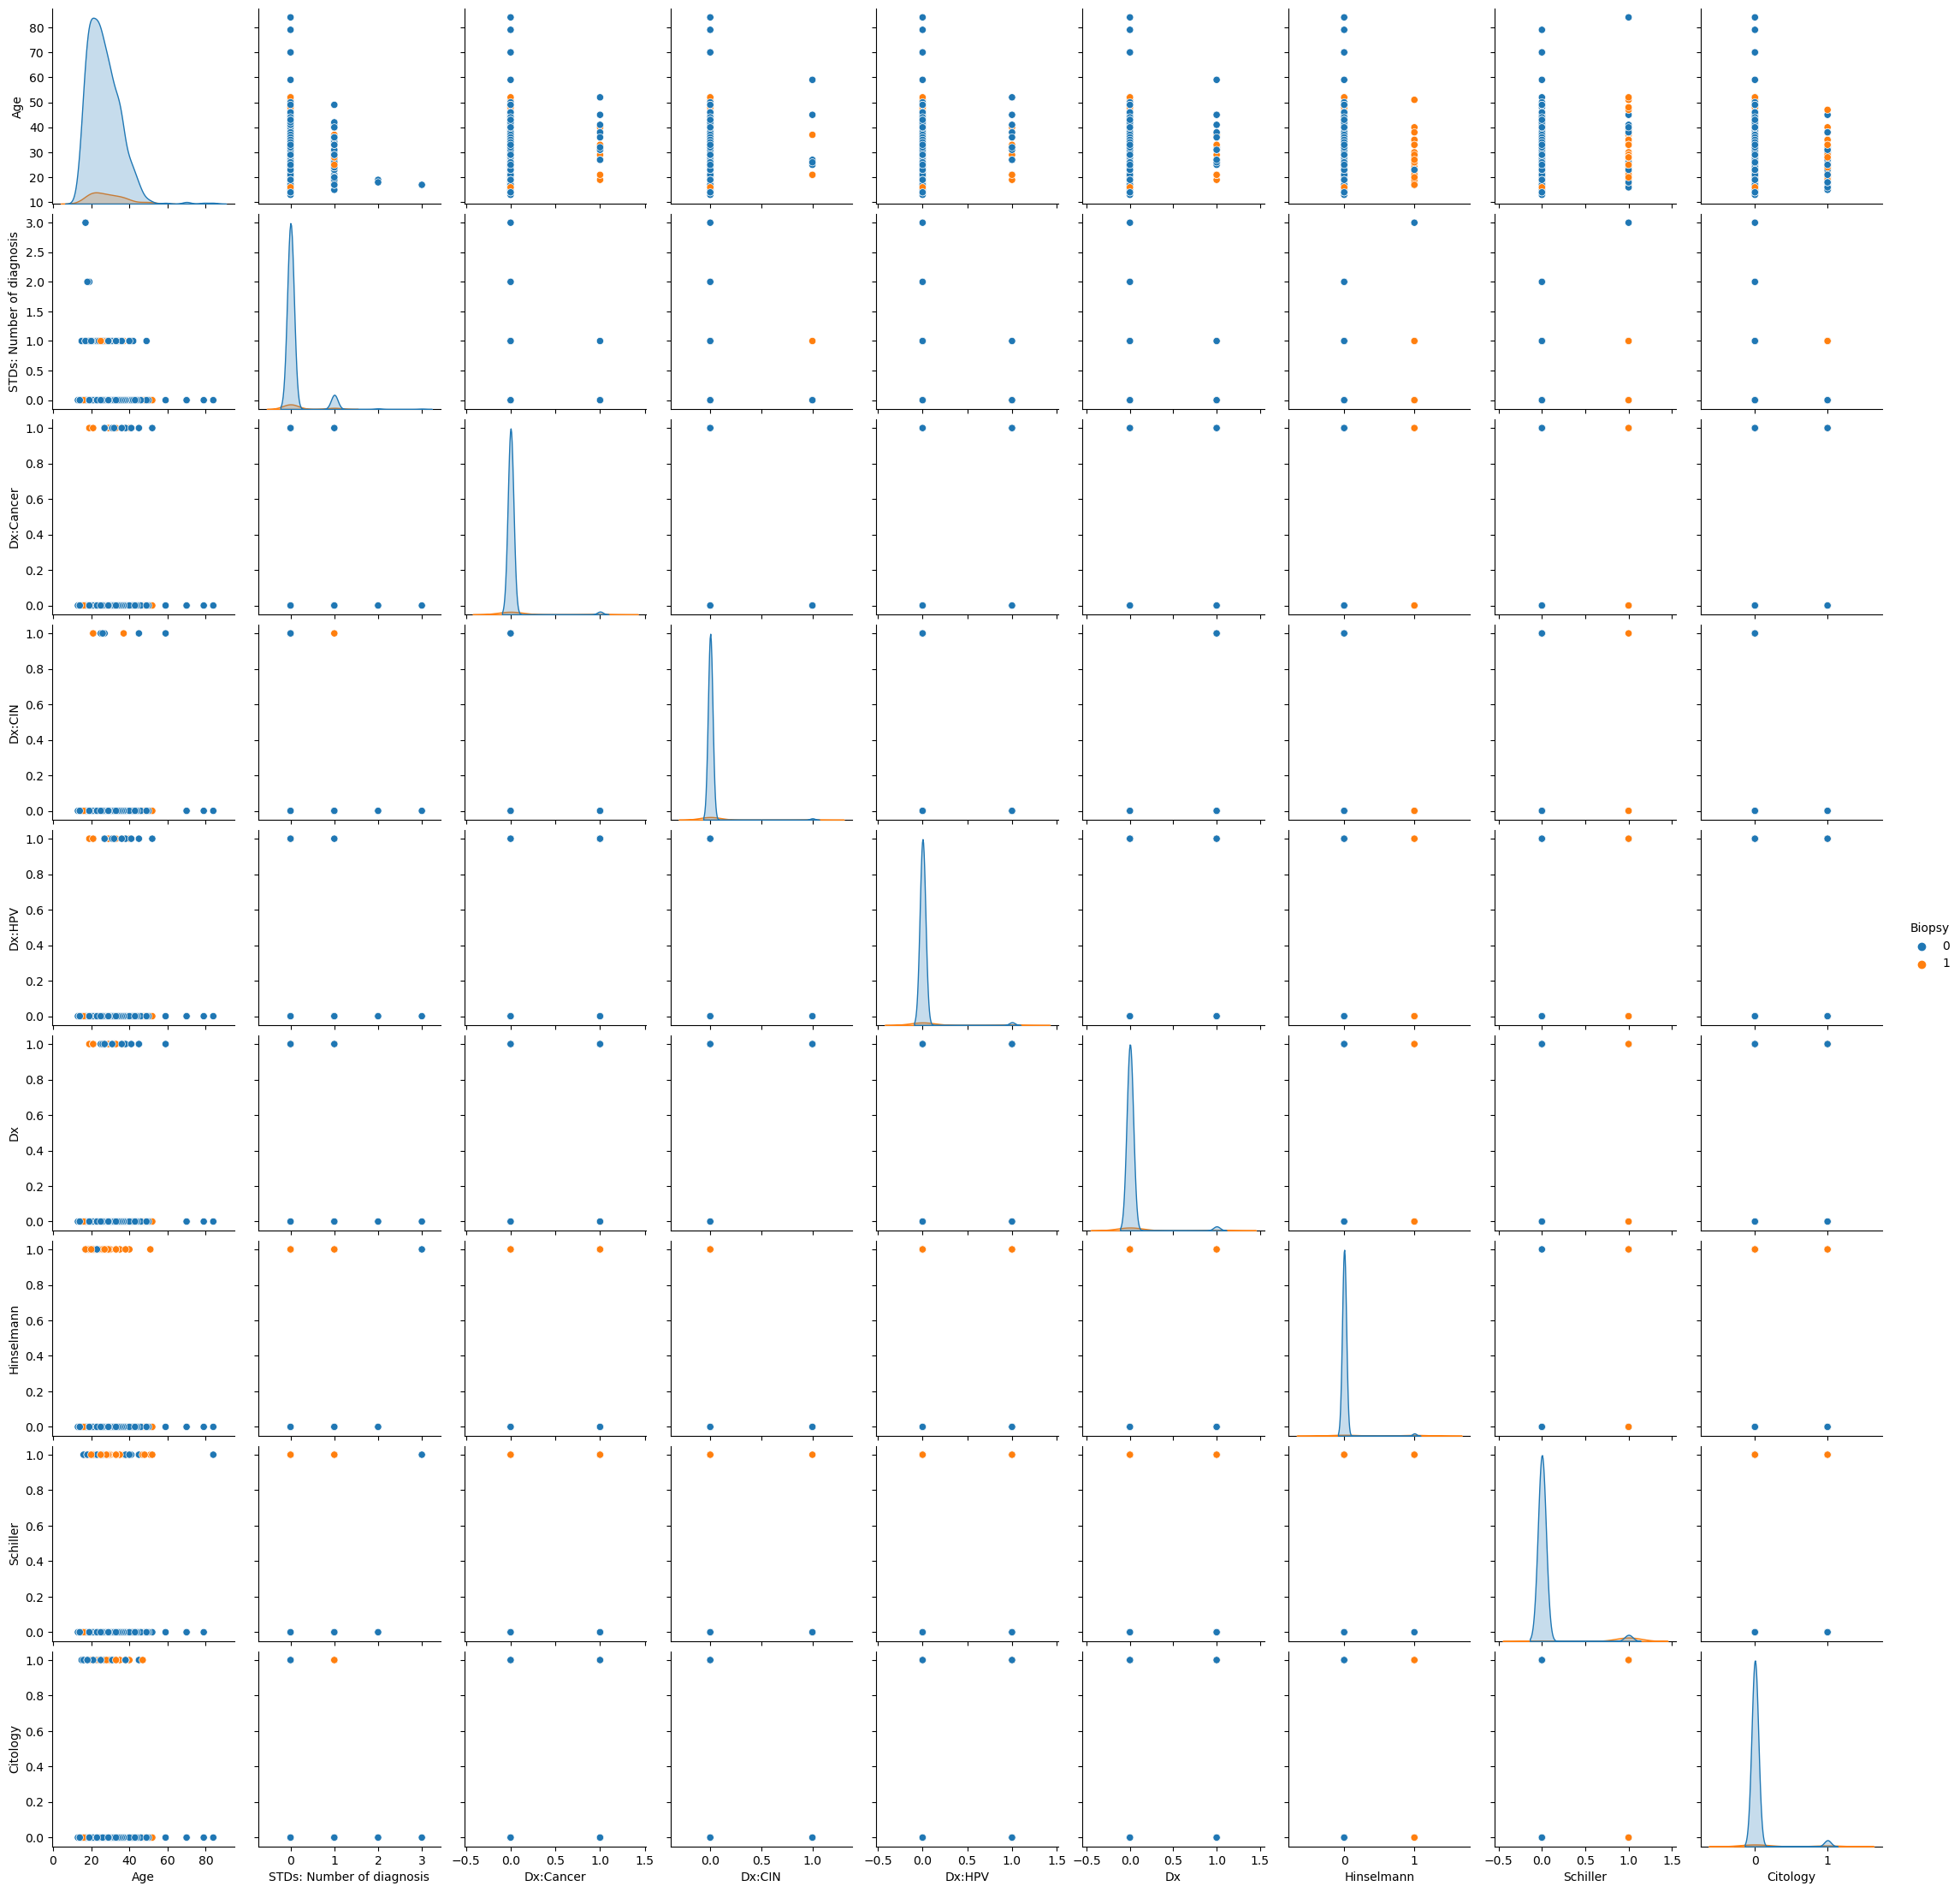

In [39]:
sns.pairplot(df, hue ='Biopsy')

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


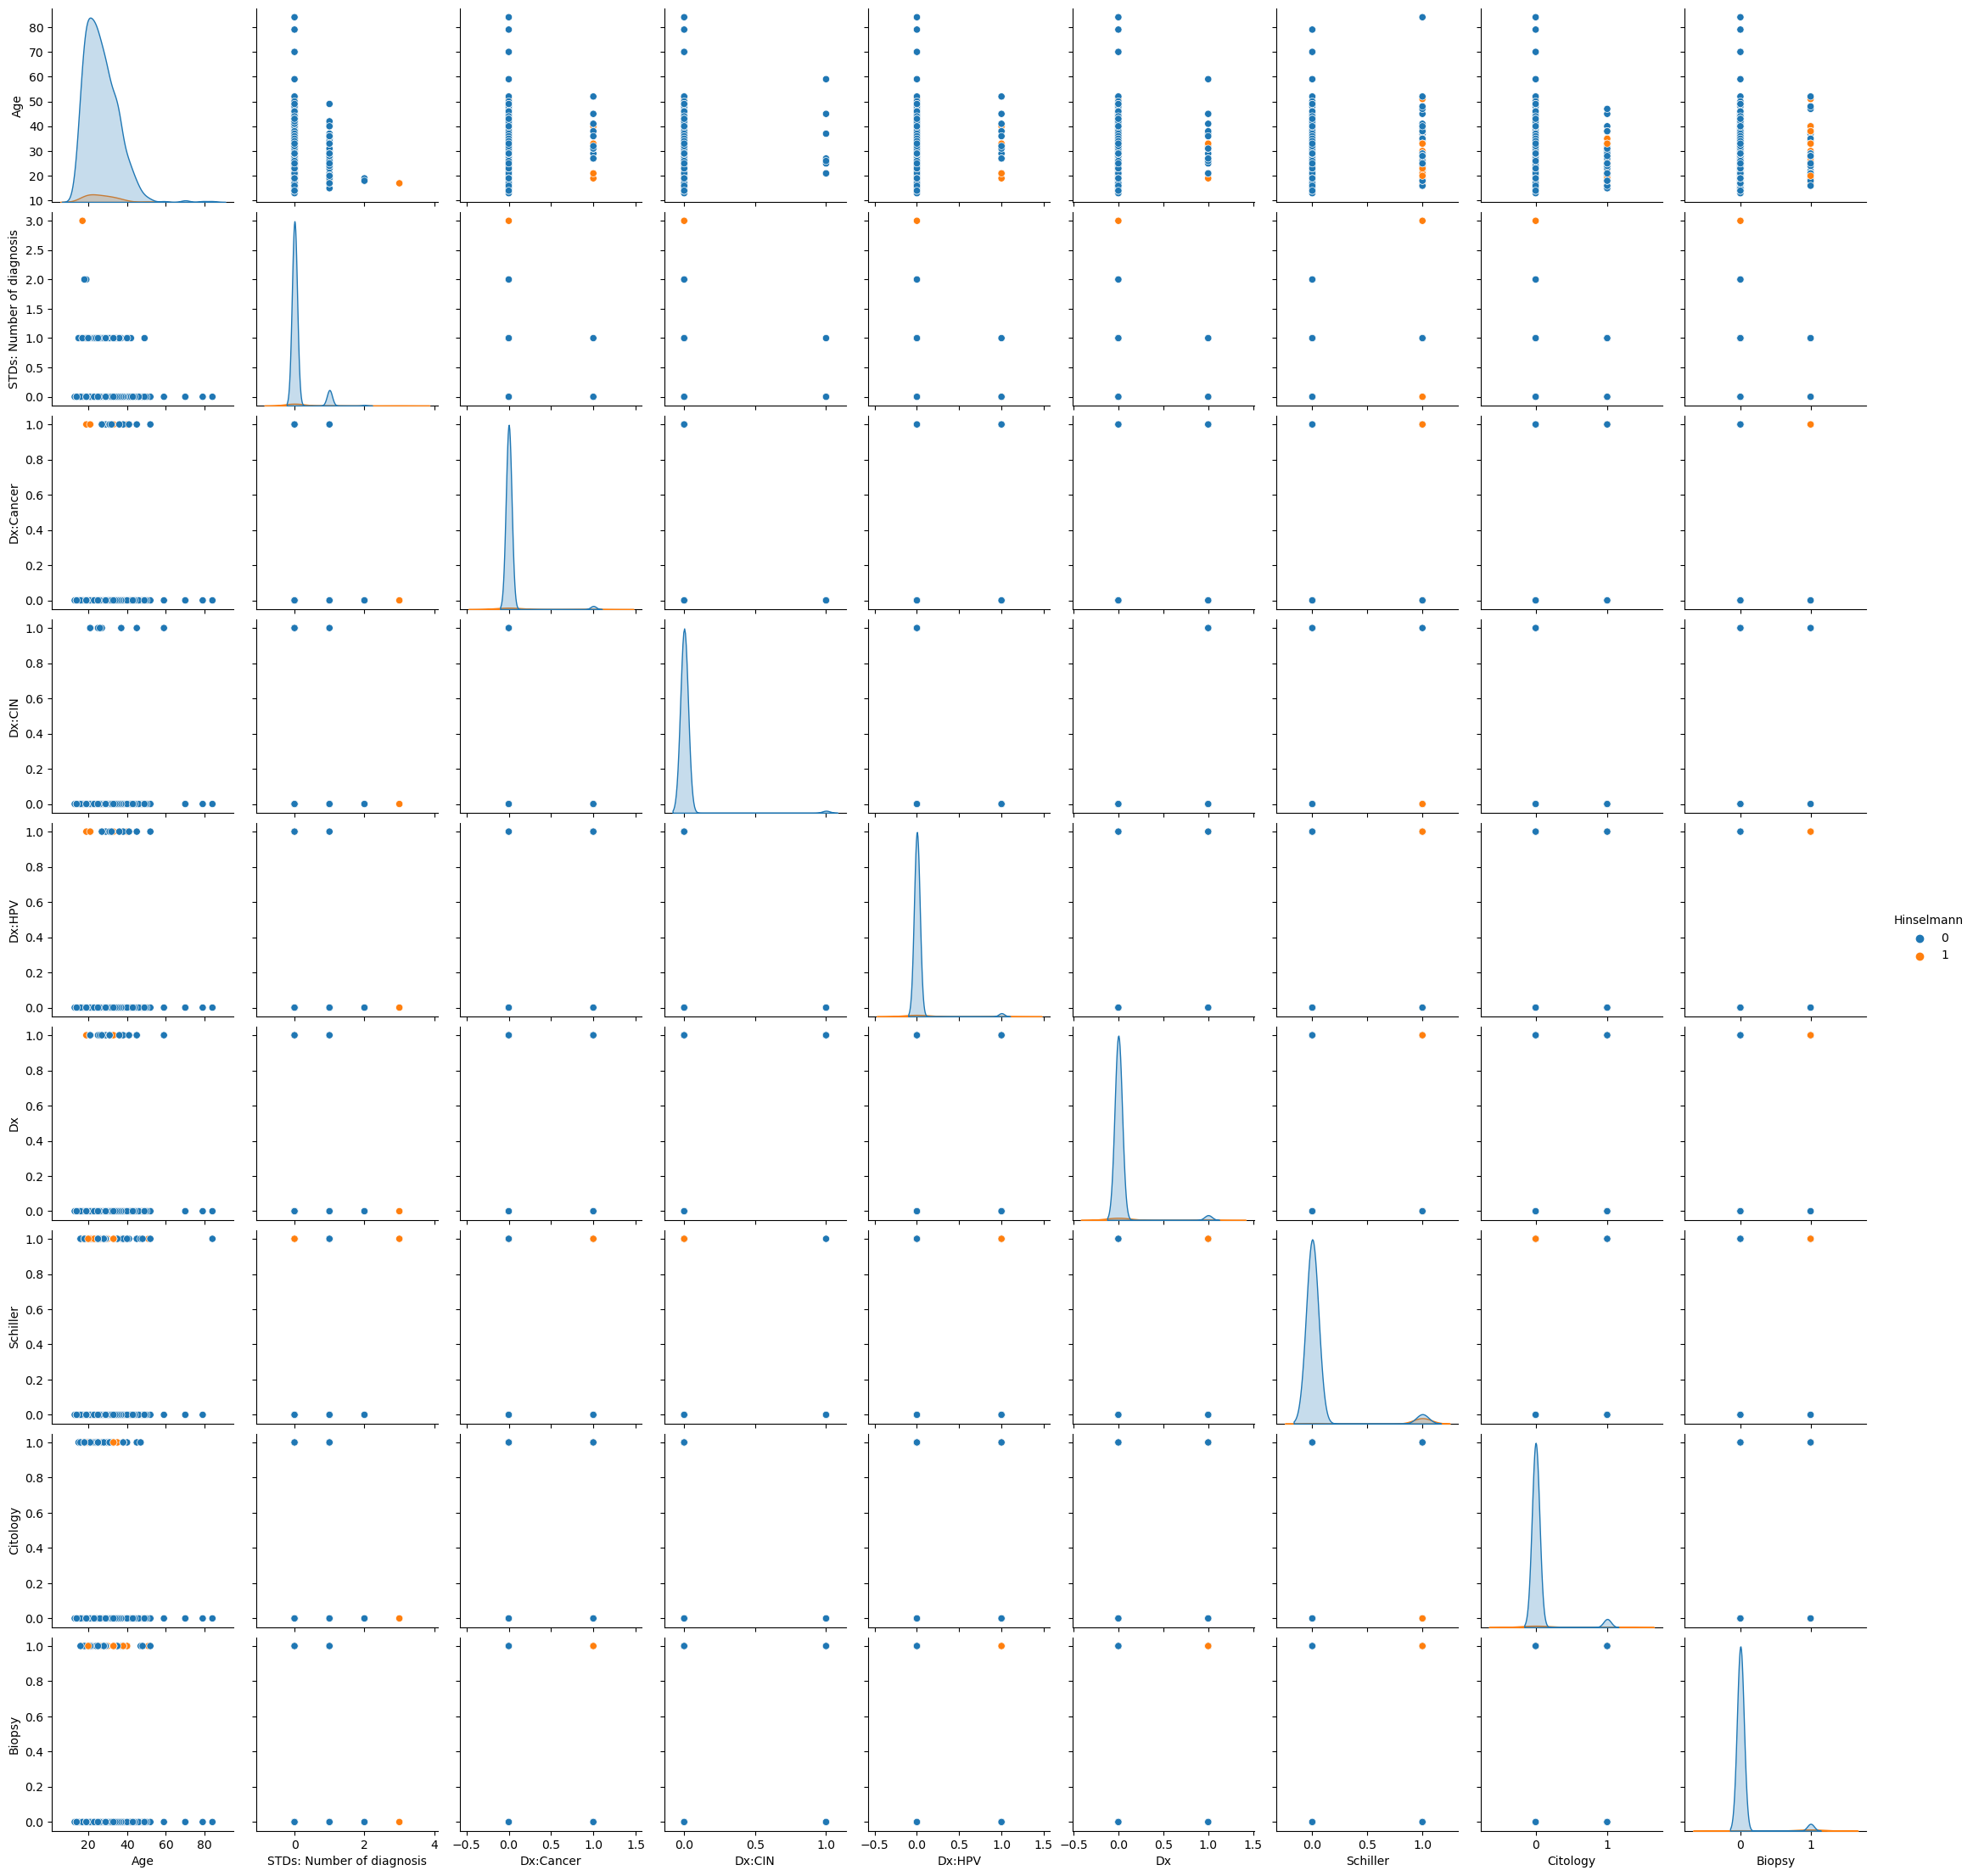

In [40]:
sns.pairplot(df, hue = 'Hinselmann')

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


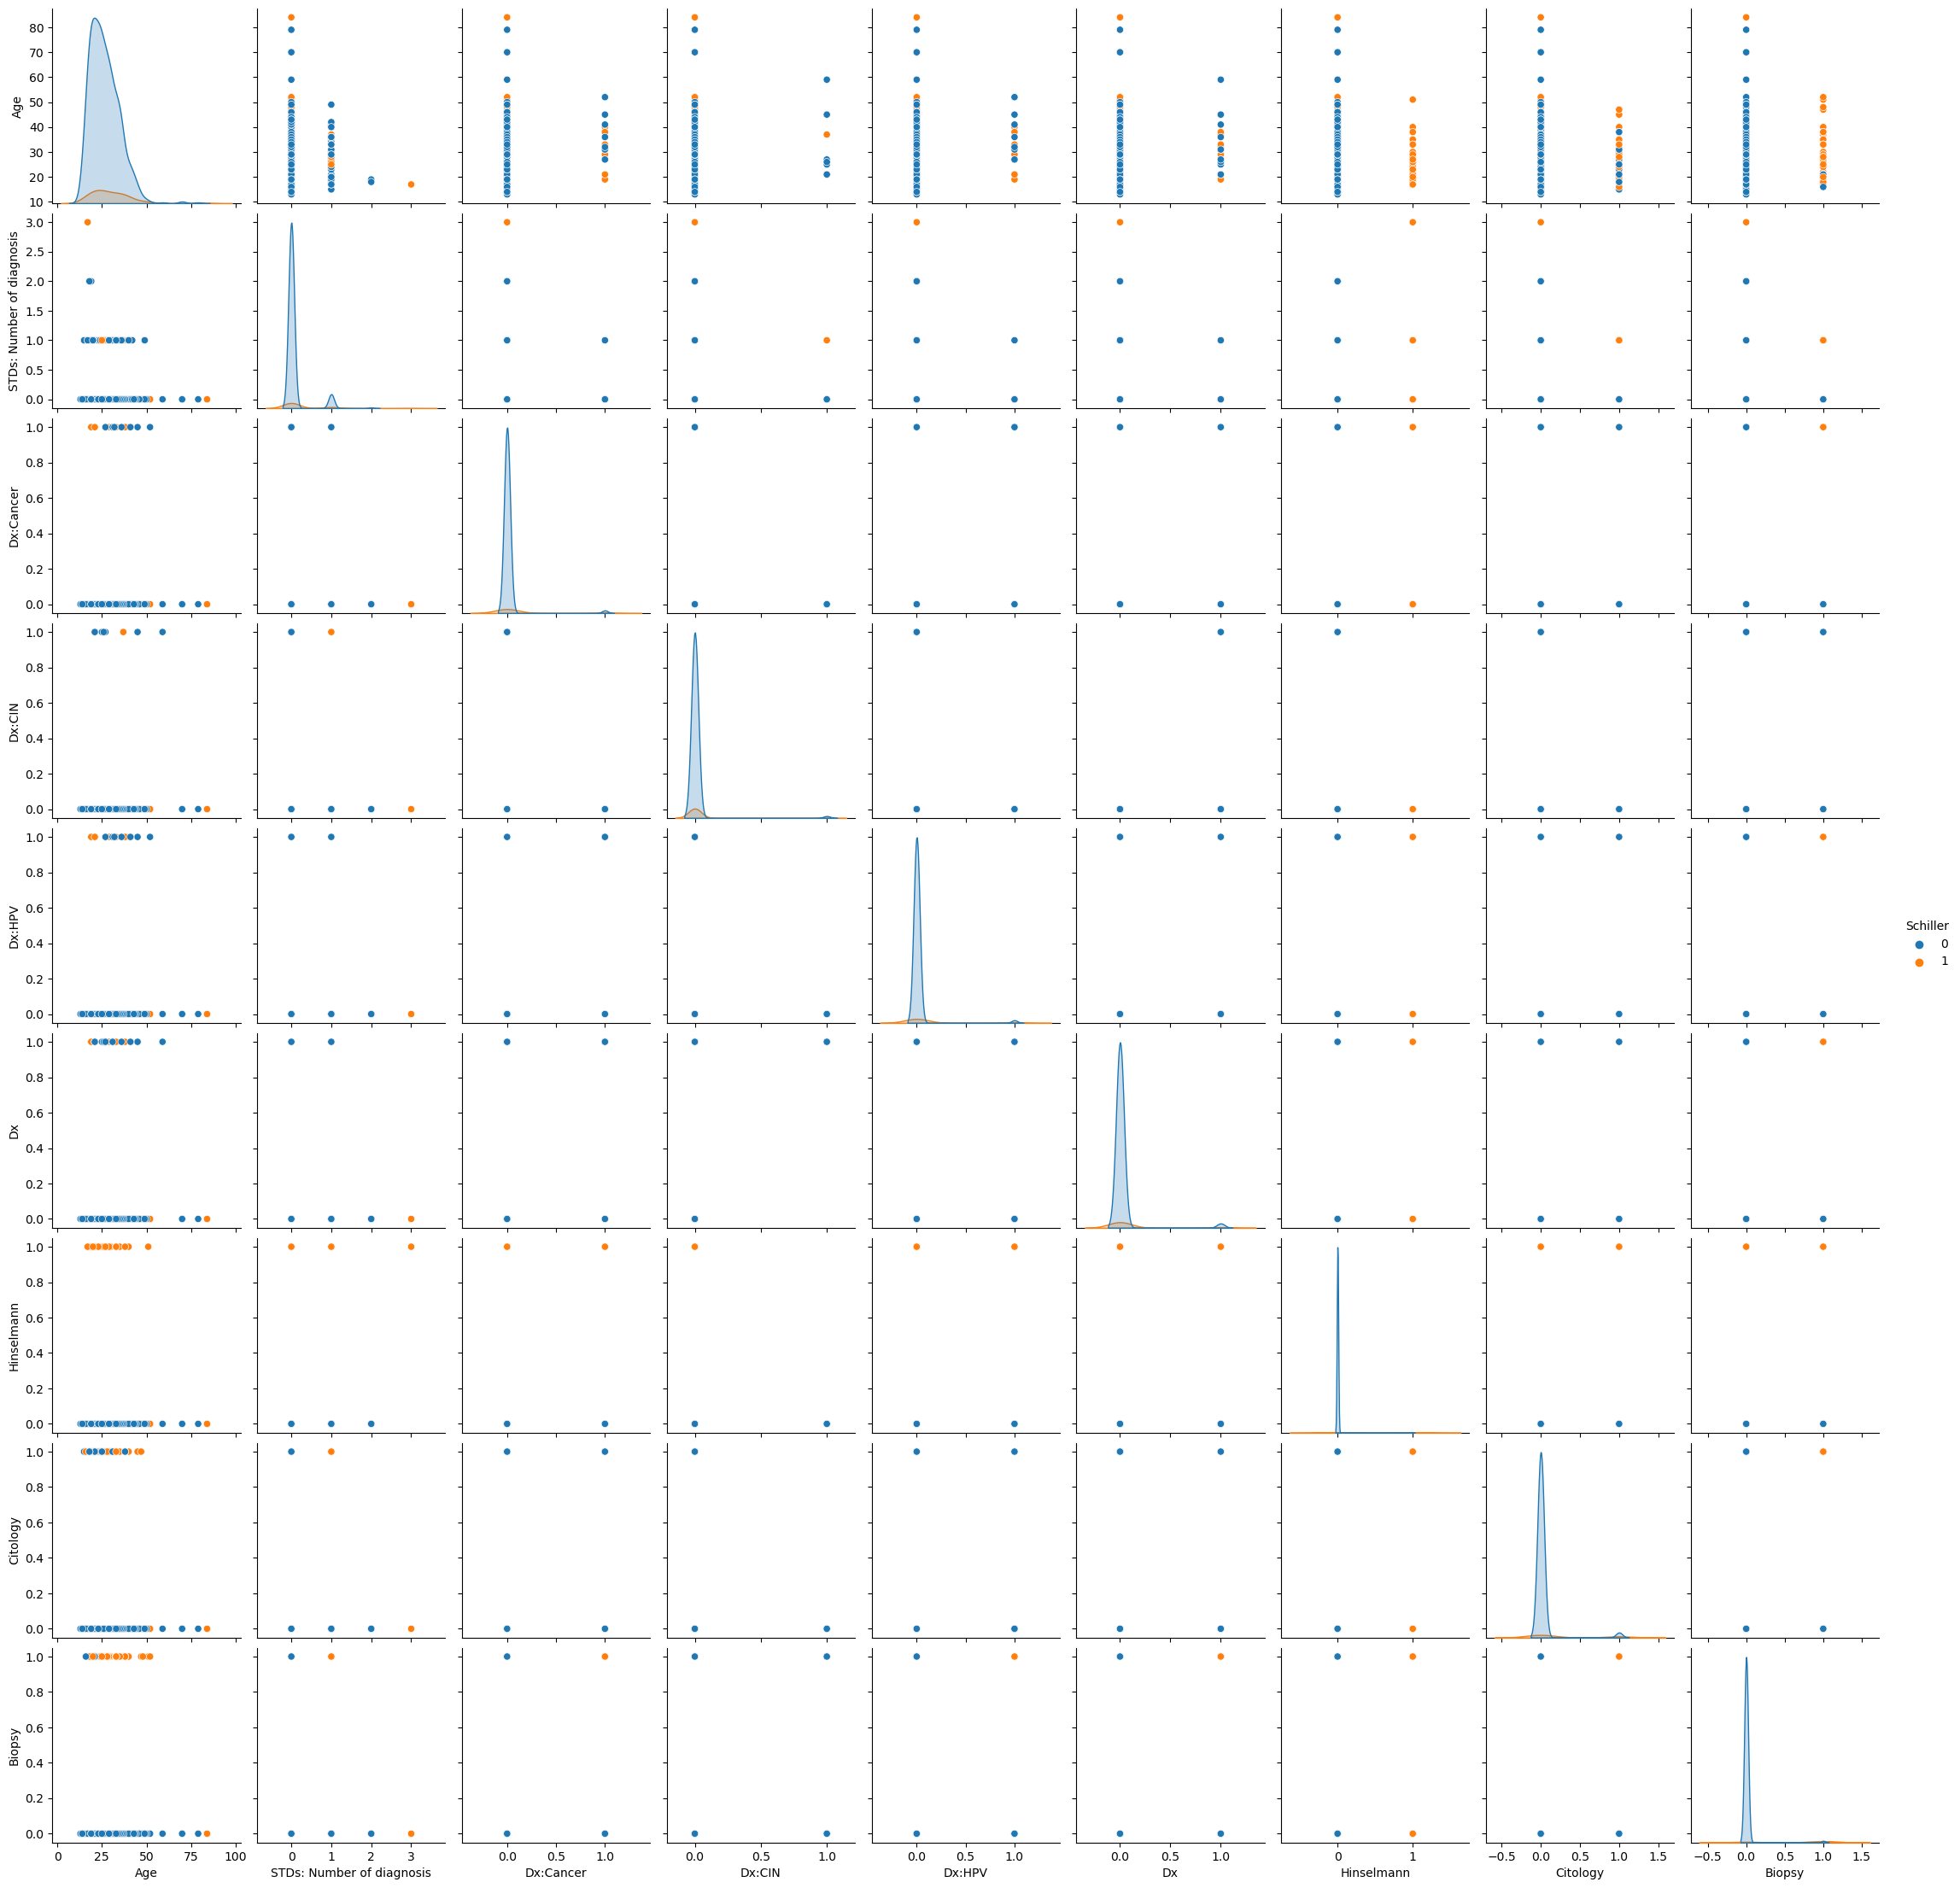

In [41]:
sns.pairplot(df, hue = 'Schiller')

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


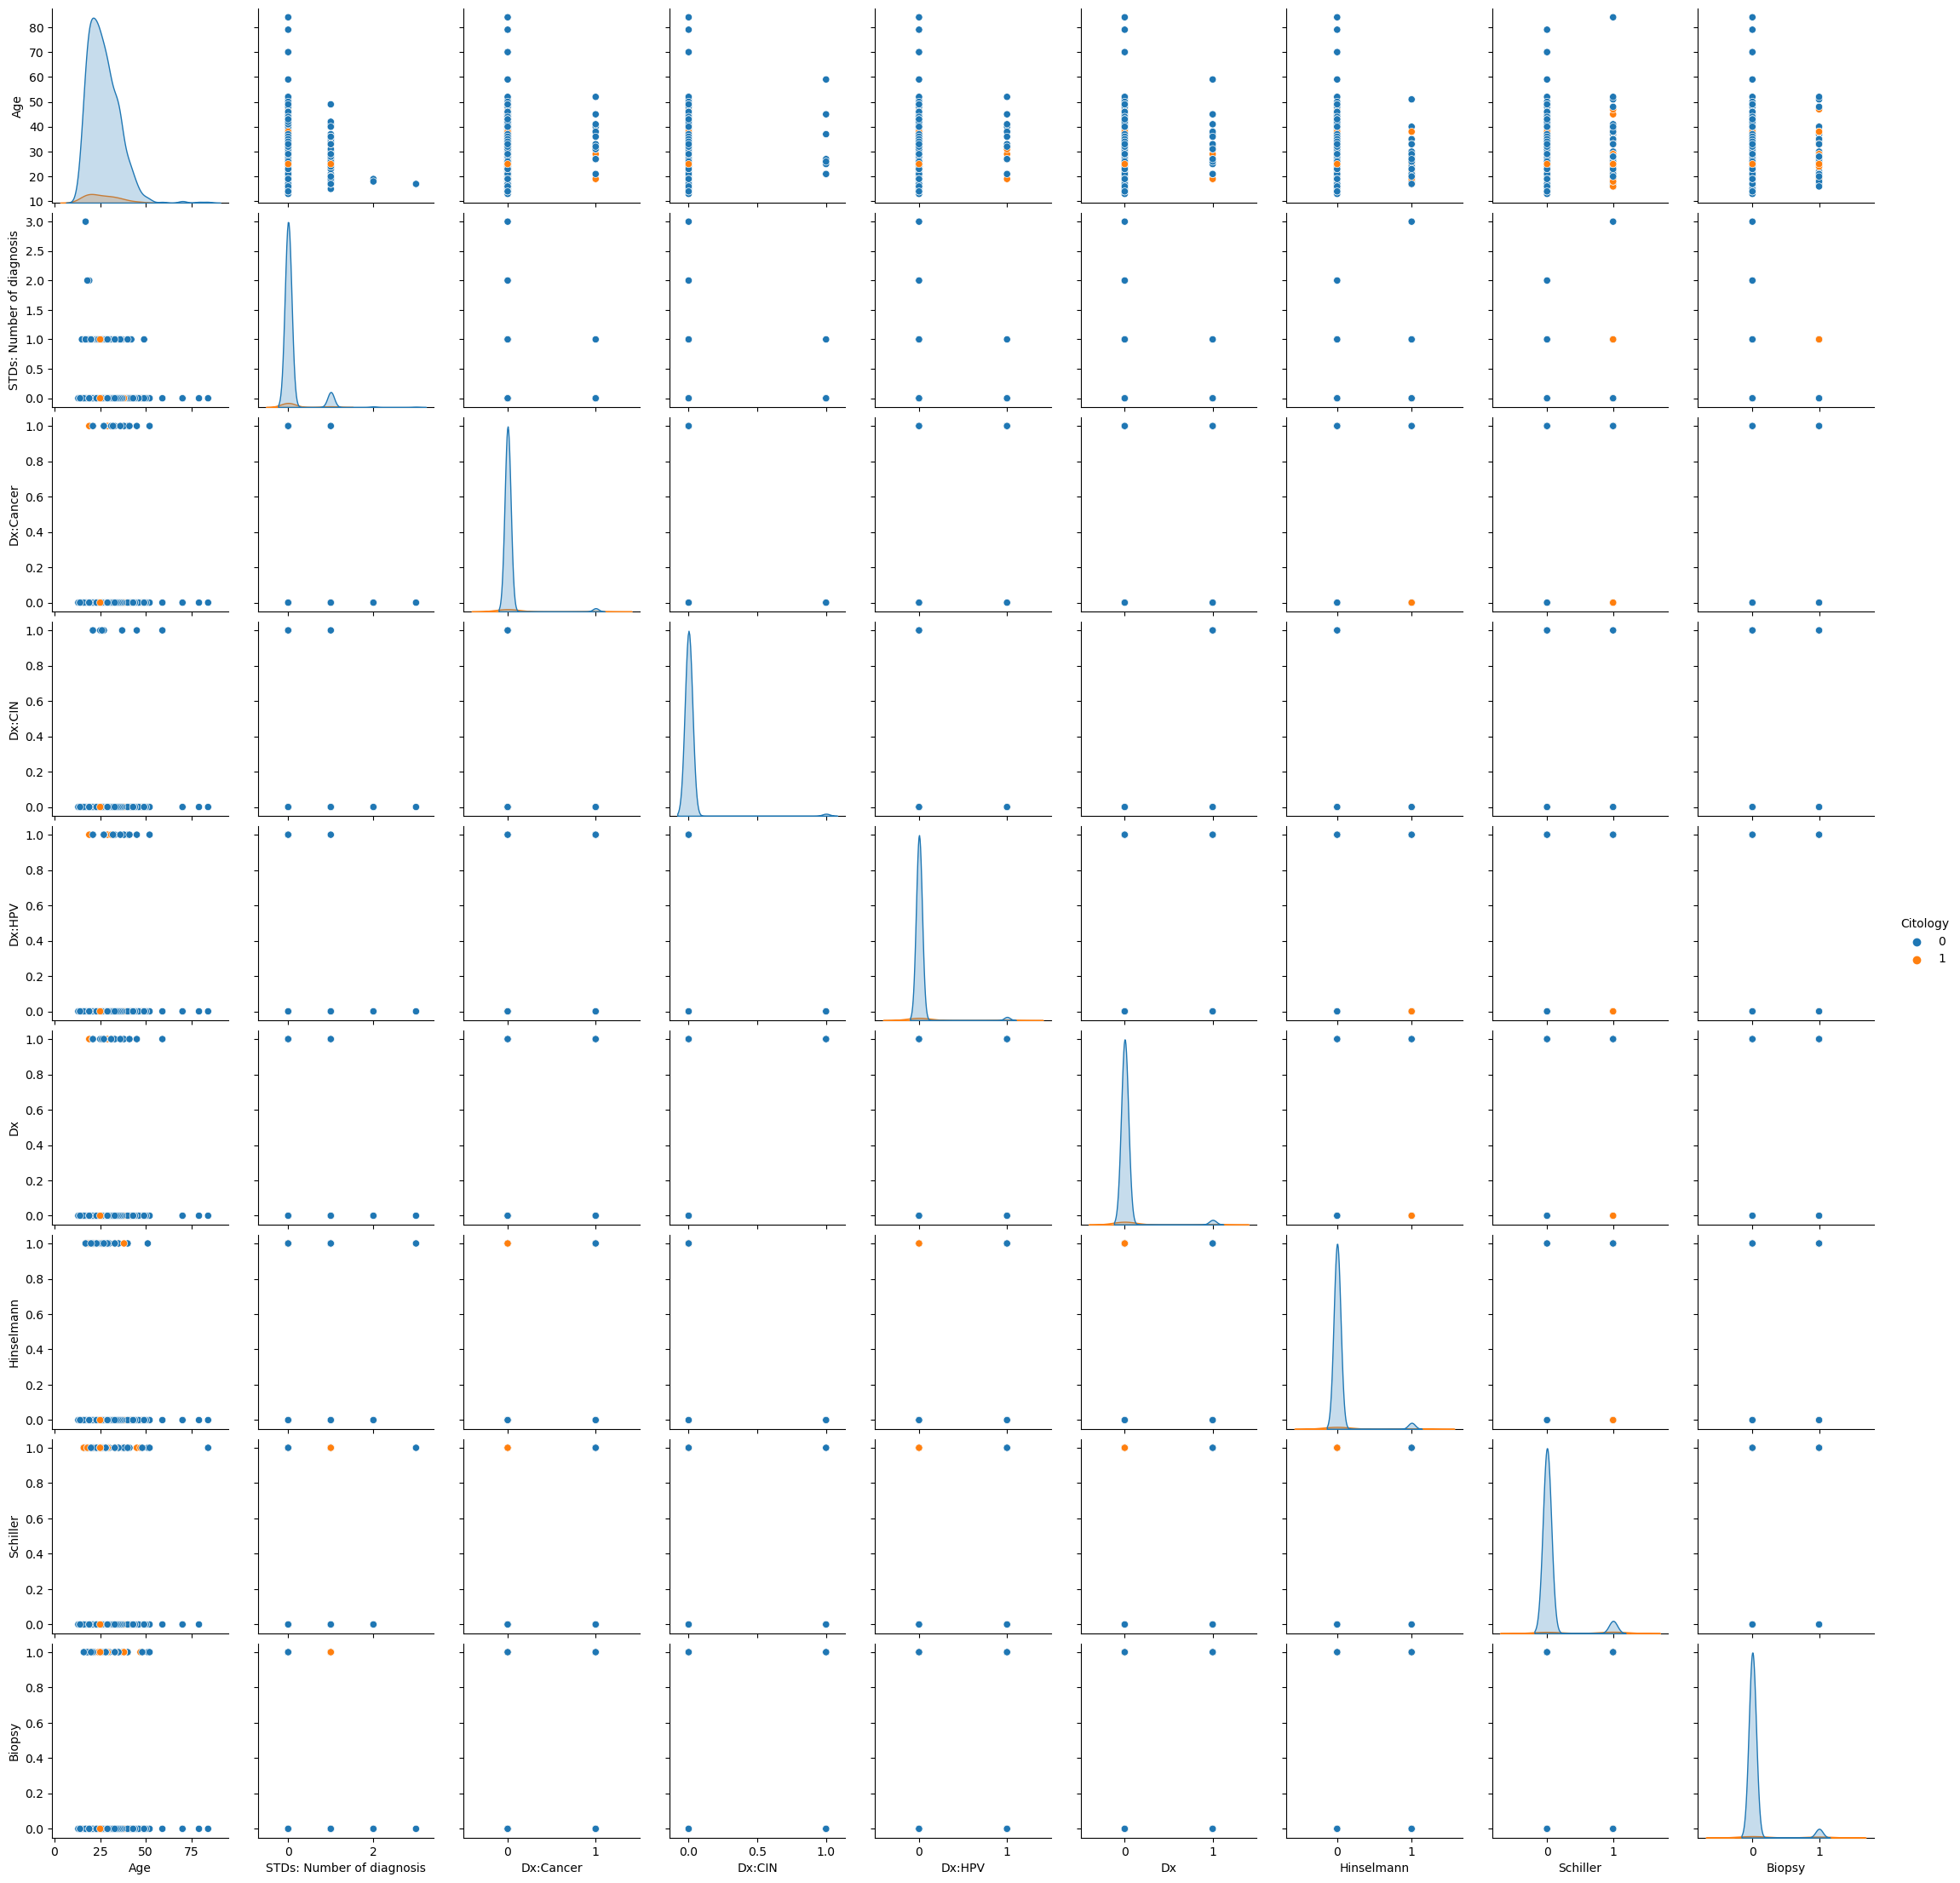

In [42]:
sns.pairplot(df, hue = 'Citology')

# Coorelation Matrix

In [43]:
df.corr()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.087669,0.300110,0.491076,0.057204,0.218261,0.131861,0.116499,0.298892,0.279429,...,0.084816,0.100251,0.110340,0.061443,0.101722,0.092635,-0.003967,0.103283,-0.016862,0.055956
Number of sexual partners,0.087669,1.000000,-0.117289,0.081464,0.236128,0.172862,0.174271,0.029114,0.032282,0.043116,...,0.062517,0.068102,0.028175,0.019817,0.032966,0.029875,-0.037440,-0.000924,0.031606,0.003342
First sexual intercourse,0.300110,-0.117289,1.000000,-0.019291,-0.108053,-0.055023,-0.056013,0.053109,0.043469,0.004831,...,0.018033,0.022691,0.065385,-0.024126,0.044937,0.038746,-0.005523,0.016453,0.000511,0.017774
Num of pregnancies,0.491076,0.081464,-0.019291,1.000000,0.071437,0.164004,0.085327,0.150964,0.216538,0.186925,...,0.071145,0.081017,0.047014,-0.069399,0.057805,-0.018988,0.029529,0.067759,-0.012585,0.015826
Smokes,0.057204,0.236128,-0.108053,0.071437,1.000000,0.723572,0.493843,-0.006397,0.040917,-0.055115,...,0.089867,0.098211,-0.013470,-0.042119,0.009737,-0.069396,0.033333,0.052028,-0.004639,0.028724
Smokes (years),0.218261,0.172862,-0.055023,0.164004,0.723572,1.000000,0.724320,-0.000290,0.052436,0.027492,...,0.100032,0.107460,0.052859,-0.030476,0.055398,-0.050213,0.070352,0.093479,-0.007275,0.061204
Smokes (packs/year),0.131861,0.174271,-0.056013,0.085327,0.493843,0.724320,1.000000,0.014806,0.043803,0.008226,...,0.051537,0.055942,0.107229,-0.020800,0.109118,-0.034270,0.026086,0.017200,0.004250,0.024487
Hormonal Contraceptives,0.116499,0.029114,0.053109,0.150964,-0.006397,-0.000290,0.014806,1.000000,0.485621,0.083174,...,0.008437,0.018892,0.047668,-0.001048,0.047668,0.007768,0.063855,0.046135,0.014195,0.049535
Hormonal Contraceptives (years),0.298892,0.032282,0.043469,0.216538,0.040917,0.052436,0.043803,0.485621,1.000000,0.115456,...,0.036723,0.044163,0.064993,0.003972,0.066509,-0.008054,0.054264,0.101250,0.084429,0.097937
IUD,0.279429,0.043116,0.004831,0.186925,-0.055115,0.027492,0.008226,0.083174,0.115456,1.000000,...,0.072388,0.079084,0.117166,0.043708,0.062142,0.135778,0.052108,0.096089,0.013292,0.059231


<Axes: >

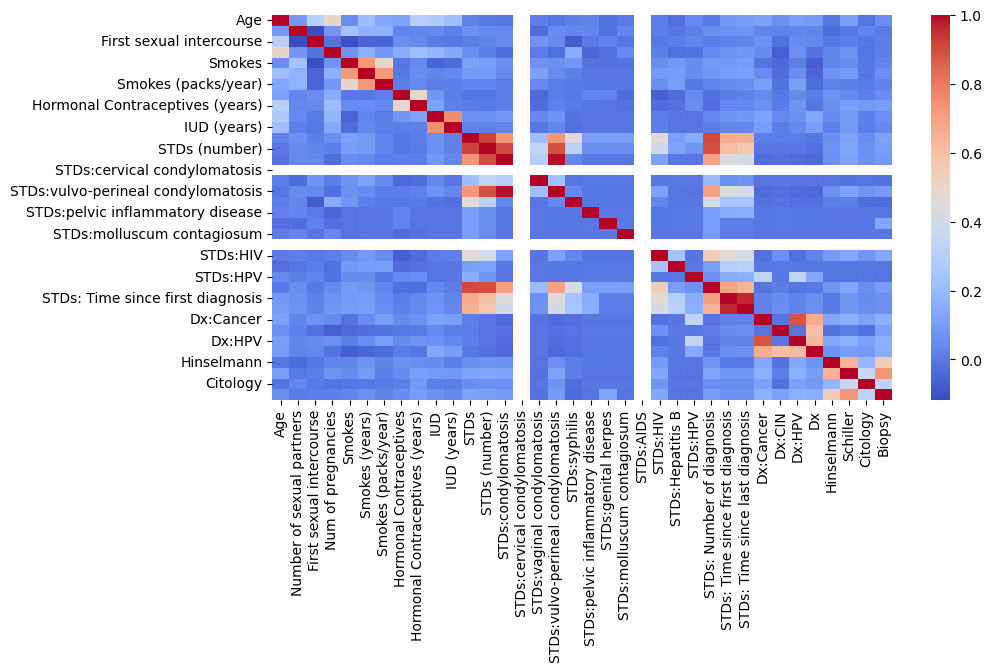

In [44]:
plt.figure(figsize=(10,5))
corr = df.corr()
sns.heatmap(corr, annot =False, cmap = 'coolwarm')

In [50]:
numerical= ['Age','Number of sexual partners','First sexual intercourse','Num of pregnancies','Smokes (years)','Smokes (packs/year)',
 'Hormonal Contraceptives (years)','IUD (years)'] # --> Choosing the proper numerical features 

df_copy = df.copy()
df_copy[numerical]=df_copy[numerical].astype('float64')

Age                                   Axes(0.125,0.712609;0.168478x0.167391)
Number of sexual partners          Axes(0.327174,0.712609;0.168478x0.167391)
First sexual intercourse           Axes(0.529348,0.712609;0.168478x0.167391)
Num of pregnancies                 Axes(0.731522,0.712609;0.168478x0.167391)
Smokes (years)                        Axes(0.125,0.511739;0.168478x0.167391)
Smokes (packs/year)                Axes(0.327174,0.511739;0.168478x0.167391)
Hormonal Contraceptives (years)    Axes(0.529348,0.511739;0.168478x0.167391)
IUD (years)                        Axes(0.731522,0.511739;0.168478x0.167391)
dtype: object

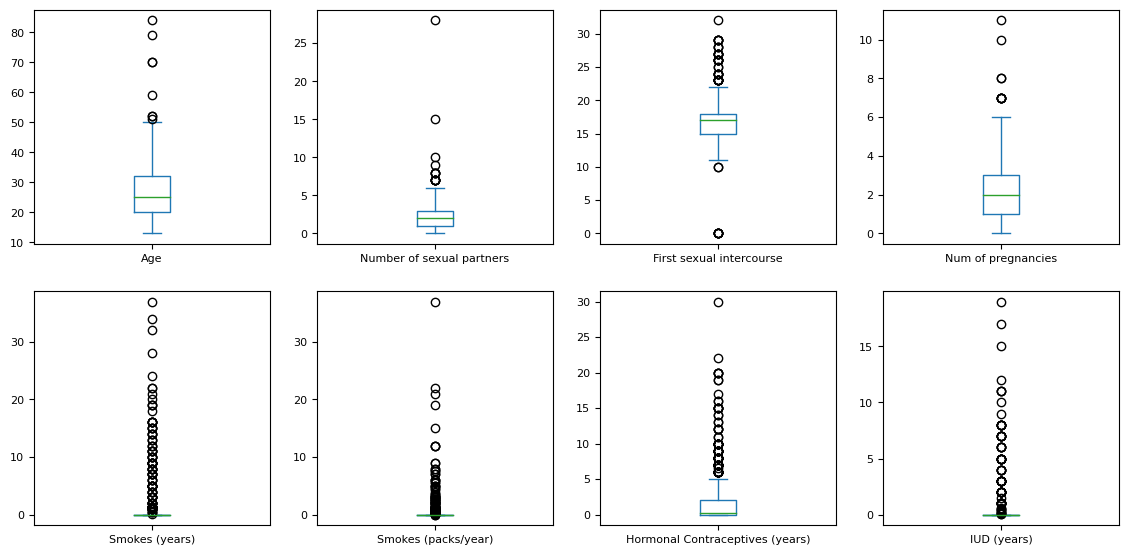

In [51]:
df_copy[numerical].plot(kind='box',subplots=True, layout=(4,4), fontsize=8, figsize=(14,14))

In [52]:
# Treating outliers
IQR=df_copy[numerical].describe().T['75%']-df_copy[numerical].describe().T['25%']

min,max=[df_copy[numerical].describe().T['25%']-(IQR*1.5),df_copy[numerical].describe().T['75%']+(IQR*1.5)]

for i in numerical:
    print('range of',i,'b/w',min[i],'and',max[i])

for i in numerical:
    df_copy[i][df_copy[i]>max[i]]=max[i]
    df_copy[i][df_copy[i]<min[i]]=min[i]

range of Age b/w 2.0 and 50.0
range of Number of sexual partners b/w -2.0 and 6.0
range of First sexual intercourse b/w 10.5 and 22.5
range of Num of pregnancies b/w -2.0 and 6.0
range of Smokes (years) b/w 0.0 and 0.0
range of Smokes (packs/year) b/w 0.0 and 0.0
range of Hormonal Contraceptives (years) b/w -3.0 and 5.0
range of IUD (years) b/w 0.0 and 0.0


C:\Users\user\AppData\Local\Temp\ipykernel_8692\2495596121.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy[i][df_copy[i]>max[i]]=max[i]
C:\Users\user\AppData\Local\Temp\ipykernel_8692\2495596121.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy[i][df_copy[i]<min[i]]=min[i]
C:\Users\user\AppData\Local\Temp\ipykernel_8692\2495596121.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy[i][df_copy[i]>max[i]]=m

Age                                   Axes(0.125,0.712609;0.168478x0.167391)
Number of sexual partners          Axes(0.327174,0.712609;0.168478x0.167391)
First sexual intercourse           Axes(0.529348,0.712609;0.168478x0.167391)
Num of pregnancies                 Axes(0.731522,0.712609;0.168478x0.167391)
Smokes (years)                        Axes(0.125,0.511739;0.168478x0.167391)
Smokes (packs/year)                Axes(0.327174,0.511739;0.168478x0.167391)
Hormonal Contraceptives (years)    Axes(0.529348,0.511739;0.168478x0.167391)
IUD (years)                        Axes(0.731522,0.511739;0.168478x0.167391)
dtype: object

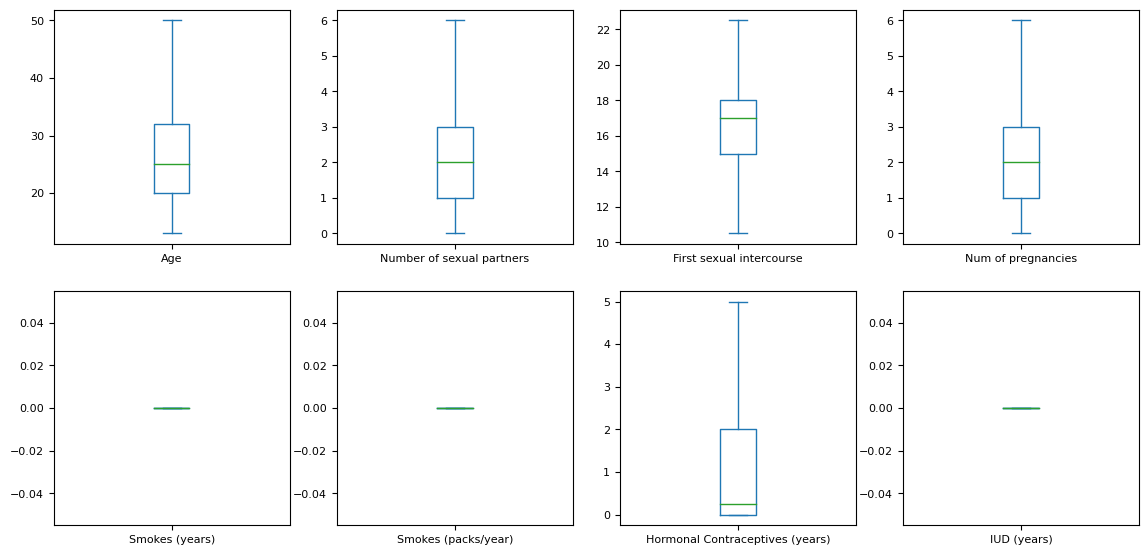

In [53]:
df_copy[numerical].plot(kind='box',subplots=True, layout=(4,4), fontsize=8, figsize=(14,14))

# Machine Learning

## Model Building

In [118]:
df = df.astype('float')

x = df.drop('Hinselmann', axis = 1)
y = df['Hinselmann']

SS = StandardScaler()
df_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns) # as scaling mandotory for KNN model 

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 1) # splitting the data set
x_train1,x_test1,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.3, random_state = 1)

l = []  #List to store the various model metrics

In [119]:
def models_lr(x,y):
    mod = {}
    model = LogisticRegression().fit(x,y)
    ypred = model.predict(x_test)
    mod['Model'] = 'LogisticRegression'
    mod['Train_Score'] = model.score(x_train,y_train)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l.append(models_lr(x_train,y_train))



In [120]:
def models_dt(x,y):
    mod = {}
    model = DecisionTreeClassifier().fit(x,y)
    ypred = model.predict(x_test)
    mod['Model'] = 'Decision Tree'
    mod['Train_Score'] = model.score(x_train,y_train)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l.append(models_dt(x_train,y_train))

In [121]:
def models_rf(x,y):
    mod = {}
    model = RandomForestClassifier().fit(x,y)
    ypred = model.predict(x_test)
    mod['Model'] = 'Random Forest'
    mod['Train_Score'] = model.score(x_train,y_train)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l.append(models_rf(x_train,y_train))

In [122]:
def models_nb(x,y):
    mod = {}
    model = GaussianNB().fit(x,y)
    ypred = model.predict(x_test)
    mod['Model'] = 'GaussianNB'
    mod['Train_Score'] = model.score(x_train,y_train)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l.append(models_nb(x_train,y_train))

In [123]:
base_df = pd.DataFrame(l)
base_df

,Model,Train_Score,Test_accuracy,f1score,recall,precision,roc_auc
0,LogisticRegression,0.976667,0.961240,0.444444,0.285714,1.000000,0.642857
1,Decision Tree,1.000000,0.957364,0.476190,0.357143,0.714286,0.674473
2,Random Forest,1.000000,0.949612,0.133333,0.071429,1.000000,0.535714
3,GaussianNB,0.096667,0.093023,0.106870,1.000000,0.056452,0.520492


In [124]:
# final model
l_final = [] #--> New list for storing metrics of base models

def models_dt(x,y):
    mod = {}
    model = DecisionTreeClassifier().fit(x,y)
    ypred = model.predict(x_test)
    mod['Model'] = 'Decision Tree After Sampling'
    mod['Train_Score'] = model.score(x_train,y_train)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l_final.append(models_dt(x_train,y_train))

In [125]:
def models_rf(x,y):
    mod = {}
    model = RandomForestClassifier().fit(x,y)
    ypred = model.predict(x_test)
    mod['Model'] = 'Random Forest After Sampling'
    mod['Train_Score'] = model.score(x_train,y_train)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l_final.append(models_rf(x_train,y_train))

In [126]:
final_model = pd.DataFrame(l_final)
final_model

,Model,Train_Score,Test_accuracy,f1score,recall,precision,roc_auc
0,Decision Tree After Sampling,1.0,0.957364,0.476190,0.357143,0.714286,0.674473
1,Random Forest After Sampling,1.0,0.953488,0.333333,0.214286,0.750000,0.605094


# Evaluation Metrics :

Accuracy :
Ratio of correctly predicted observation to the total observations. It is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost same.

Precision :
The ratio of correctly predicted positive observations to the total predicted positive observations.

Recall (Sensitivity) :
The ratio of correctly predicted positive observations to the all observations in actual class - yes(1).

F1 Score :
The weighted average of Precision and Recall

ROC score :
Measures how well the model can segragate the target classes.

# Model Inference :

Specifically as this is an sensitive medical data, recall score needs to be given higher importance and hence we are choosing both "Decision Tree" and "Random Forest" models as our base model because of their higher recall and roc_auc scores.

Why recall should be given higher importance is that we have to predict actual cancer patients as cancer patient accurately.
Predicting a cancer patient as a healthy (non-cancer) is very dangerous and if predicted wrongly it may cause chaos to the life of a patient.